In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from collections import Counter

data = pd.read_csv("spotify-2023.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def conversion(x):
    return pd.to_numeric(x.str.replace(',', '', regex=True), errors='coerce')

data['streams'] = conversion(data['streams'])
data['in_deezer_playlists'] = conversion(data['in_deezer_playlists'])
data['in_shazam_charts'] = conversion(data['in_shazam_charts'])

data = data.dropna()

def myfilter(x):
    return list(map(lambda x: x.strip(), str(x).replace("Tyler, The Creator","Tyler - The Creator").split(',')))
    
artists = data['artist(s)_name'].apply(myfilter)


#artists = artists[artists.apply(lambda x : len(x) == 1)]

fart = set()
for i in artists:
    for j in i:
        if j.strip() != '':
            fart.add(j.strip())
print(len(fart))
fart

625


{'(G)I-DLE',
 '070 Shake',
 '21 Savage',
 '2Pac',
 '347aidan',
 '4*TOWN (From Disney and Pixar���s Turning Red)',
 '50 Cent',
 'A$AP Rocky',
 'ACRAZE',
 'AP Dhillon',
 'ARIZONATEARS',
 'Abhijay Sharma',
 'Abhir Hathi',
 'Adele',
 'Aerosmith',
 'AgroPlay',
 'Agust D',
 'Aitana',
 'Aitch',
 'Alec Benjamin',
 'Alejo',
 'Ali Sethi',
 'Alicia Keys',
 'Altamash Faridi',
 'Alvaro Diaz',
 'Amaarae',
 'Amanda Reifer',
 'Amitabh Bhattacharya',
 'Amitabha Bhattacharya',
 'Ana Castela',
 'Anderson .Paak',
 'Andy Williams',
 'Angela Aguilar',
 'Anggi Marito',
 'Anitta',
 'Anne-Marie',
 'AnnenMayKantereit',
 'Anuel Aa',
 'Arcane',
 'Arcangel',
 'Arctic Monkeys',
 'Ariana Grande',
 'Arijit Singh',
 'Armani White',
 'Ava',
 'Aventura',
 'Avicii',
 'Ayparia',
 'B. Swanson Quartet',
 'BIGBANG',
 'BL',
 'BLACKPINK',
 'BLESSD',
 'BTS',
 'BYOR',
 'Baby Keem',
 'Baby Tate',
 'Bad B',
 'Bad Bunny',
 'Beach Weather',
 'Beam',
 'Bebe Rexha',
 'Becky G',
 'Becky Hill',
 'Bellakath',
 'Benson Boone',
 'Beth Gibb

In [65]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    int64  
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    float64
 14  bpm                   816 non-null    int64  
 15  key                   816 no

In [73]:
# Step 1: Split artist names into individual entries
data['artist_list'] = data['artist(s)_name'].apply(myfilter)

# Step 2: Flatten the list of artists and count occurrences
all_artists = [artist.strip() for artists in data['artist_list'] for artist in artists]
artist_counts = Counter(all_artists)

# Step 3: Find the top 10 artists with the most songs
top_10_artists = artist_counts.most_common(10)

# Step 4: Convert to a DataFrame for display
top_10_df = pd.DataFrame(top_10_artists, columns=['Artist', 'Song_Count'])

print(top_10_df)

           Artist  Song_Count
0       Bad Bunny          36
1    Taylor Swift          32
2      The Weeknd          27
3  Kendrick Lamar          23
4             SZA          21
5            Feid          21
6           Drake          18
7       21 Savage          13
8    Metro Boomin          13
9      Peso Pluma          12


In [74]:
target_artists = top_10_df["Artist"].values
artists = data["artist_list"][data["artist_list"].apply(lambda x: any([artist in target_artists for artist in x]))]

print(artists[artists.apply(lambda x: "Bad Bunny" in x)])

# artists = artists[artists.apply(lambda x : len(x) > 1)]

te = TransactionEncoder()
te_data = te.fit(artists).transform(artists)

encoded_data = pd.DataFrame(te_data, columns=te.columns_)
frequent_itemsets = apriori(encoded_data, min_support=0.001, use_colnames=True)

print(frequent_itemsets)

4                              [Bad Bunny]
10             [Bad Bunny, Grupo Frontera]
27                      [Tainy, Bad Bunny]
87           [Chencho Corleone, Bad Bunny]
92             [Bad Bunny, Eladio Carrion]
192                            [Bad Bunny]
217                  [Arcangel, Bad Bunny]
239                            [Bad Bunny]
291                [Nengo Flow, Bad Bunny]
362                            [Bad Bunny]
368                  [J Balvin, Bad Bunny]
377                            [Bad Bunny]
422                            [Bad Bunny]
490               [Bad Bunny, Jhay Cortez]
494            [Bad Bunny, Rauw Alejandro]
528    [Julieta Venegas, Bad Bunny, Tainy]
547                  [Aventura, Bad Bunny]
555               [Bad Bunny, Jhay Cortez]
570                [Sech, Bad Bunny, Mora]
632      [J Balvin, Nio Garcia, Bad Bunny]
696              [Daddy Yankee, Bad Bunny]
716                            [Bad Bunny]
732              [Daddy Yankee, Bad Bunny]
766        

In [75]:
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=1)

filtered_rules = rules[(rules['antecedents'].map(len) > 1) & 
                       (rules['consequents'].map(len) == 1)]

filtered_rules = filtered_rules.sort_values(by=['confidence', 'lift', 'leverage'], ascending=False, inplace=False)

filtered_rules

antecedents            consequents  \
178                   (21 Savage, Tyler - The Creator)    (Pharrell Williams)   
182                             (Metro Boomin, Roisee)           (A$AP Rocky)   
183                         (Metro Boomin, A$AP Rocky)               (Roisee)   
188                                       (Robi, Feid)                (Alejo)   
189                                      (Alejo, Feid)                 (Robi)   
192                            (Blxst, Kendrick Lamar)        (Amanda Reifer)   
193                    (Amanda Reifer, Kendrick Lamar)                (Blxst)   
219                               (Toian, Don Toliver)                 (Beam)   
220                                (Beam, Don Toliver)                (Toian)   
224                              (Don Toliver, WizKid)                 (Beam)   
228                              (Toian, Metro Boomin)                 (Beam)   
229                               (Metro Boomin, Beam)                (Toian)   
234                             (Metro Boomin, WizKid)                 (Beam)   
239                                    (Toian, WizKid)                 (Beam)   
240                                     (Beam, WizKid)                (Toian)   
247                                  (Lil Baby, Drake)            (DJ Khaled)   
249                                 (Drake, DJ Khaled)             (Lil Baby)   
252                                    (Pailita, Feid)         (De La Ghetto)   
254                               (Feid, De La Ghetto)              (Pailita)   
257                                (Paloma Mami, Feid)         (De La Ghetto)   
259                               (Feid, De La Ghetto)          (Paloma Mami)   
262                           (Polima WestCoast, Feid)         (De La Ghetto)   
264                               (Feid, De La Ghetto)     (Polima WestCoast)   
267                             (Paloma Mami, Pailita)         (De La Ghetto)   
268                        (Paloma Mami, De La Ghetto)              (Pailita)   
269                            (Pailita, De La Ghetto)          (Paloma Mami)   
273                        (Pailita, Polima WestCoast)         (De La Ghetto)   
274                            (Pailita, De La Ghetto)     (Polima WestCoast)   
275                   (Polima WestCoast, De La Ghetto)              (Pailita)   
279                    (Paloma Mami, Polima WestCoast)         (De La Ghetto)   
280                        (Paloma Mami, De La Ghetto)     (Polima WestCoast)   
281                   (Polima WestCoast, De La Ghetto)          (Paloma Mami)   
296                              (Don Toliver, WizKid)                (Toian)   
310                                    (Drake, WizKid)                 (Kyla)   
315                                       (Feid, Sech)               (Jhayco)   
326                                (Myke Towers, Feid)        (Sky Rompiendo)   
328                              (Sky Rompiendo, Feid)          (Myke Towers)   
332                                (Paloma Mami, Feid)              (Pailita)   
333                                    (Pailita, Feid)          (Paloma Mami)   
337                                    (Pailita, Feid)     (Polima WestCoast)   
338                           (Polima WestCoast, Feid)              (Pailita)   
342                                (Paloma Mami, Feid)     (Polima WestCoast)   
343                           (Polima WestCoast, Feid)          (Paloma Mami)   
346                                      (Saiko, Feid)              (Quevedo)   
348                                    (Feid, Quevedo)                (Saiko)   
363                    (Summer Walker, Kendrick Lamar)     (Ghostface Killah)   
364                 (Ghostface Killah, Kendrick Lamar)        (Summer Walker)   
367                          (Lil Wayne, Metro Boomin)               (Offset)   
373                          (Lil Wayne, Metro Boomin)             (Swae L

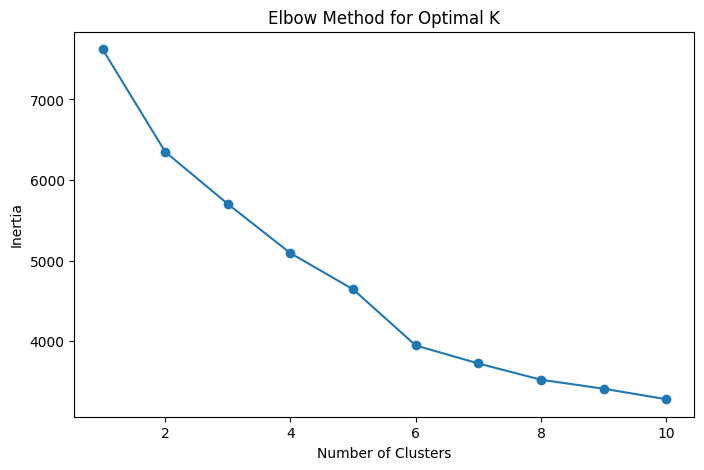

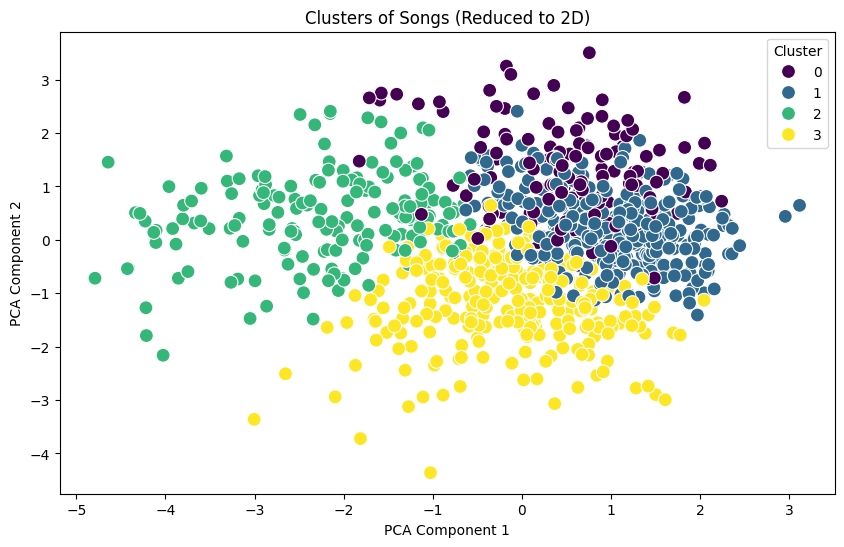

                bpm  danceability_%   energy_%  valence_%  acousticness_%  \
Cluster                                                                     
0        124.992424       73.803030  63.181818  52.568182       26.689394   
1        115.187845       76.591160  71.491713  68.991713       19.513812   
2        117.642045       54.909091  42.380682  36.176136       65.755682   
3        133.848057       58.975265  69.183746  37.925795       12.812721   

         instrumentalness_%  liveness_%  speechiness_%  
Cluster                                                 
0                  0.083333   16.015152      31.196970  
1                  0.419890   15.911602       6.991713  
2                  2.596591   15.528409       6.278409  
3                  3.134276   23.851590       6.717314  


In [9]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# data = pd.read_csv('spotify-2023.csv')

# # Select features for clustering
# features = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 
#             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# # Drop missing values for the selected features
# data = data.dropna(subset=features)

# # Normalize the features
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(data[features])

# # Determine optimal number of clusters using the Elbow Method
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(features_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal K')
# plt.show()

# # Apply K-Means with the optimal number of clusters
# optimal_k = 4  # Adjust based on the Elbow Curve
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# data['Cluster'] = kmeans.fit_predict(features_scaled)

# # Reduce dimensions to 2 for visualization
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(features_scaled)
# data['PCA1'] = reduced_features[:, 0]
# data['PCA2'] = reduced_features[:, 1]

# # Plot the clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
# plt.title('Clusters of Songs (Reduced to 2D)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(title='Cluster')
# plt.show()

# # Display cluster feature summary
# cluster_summary = data.groupby('Cluster')[features].mean()
# print(cluster_summary)


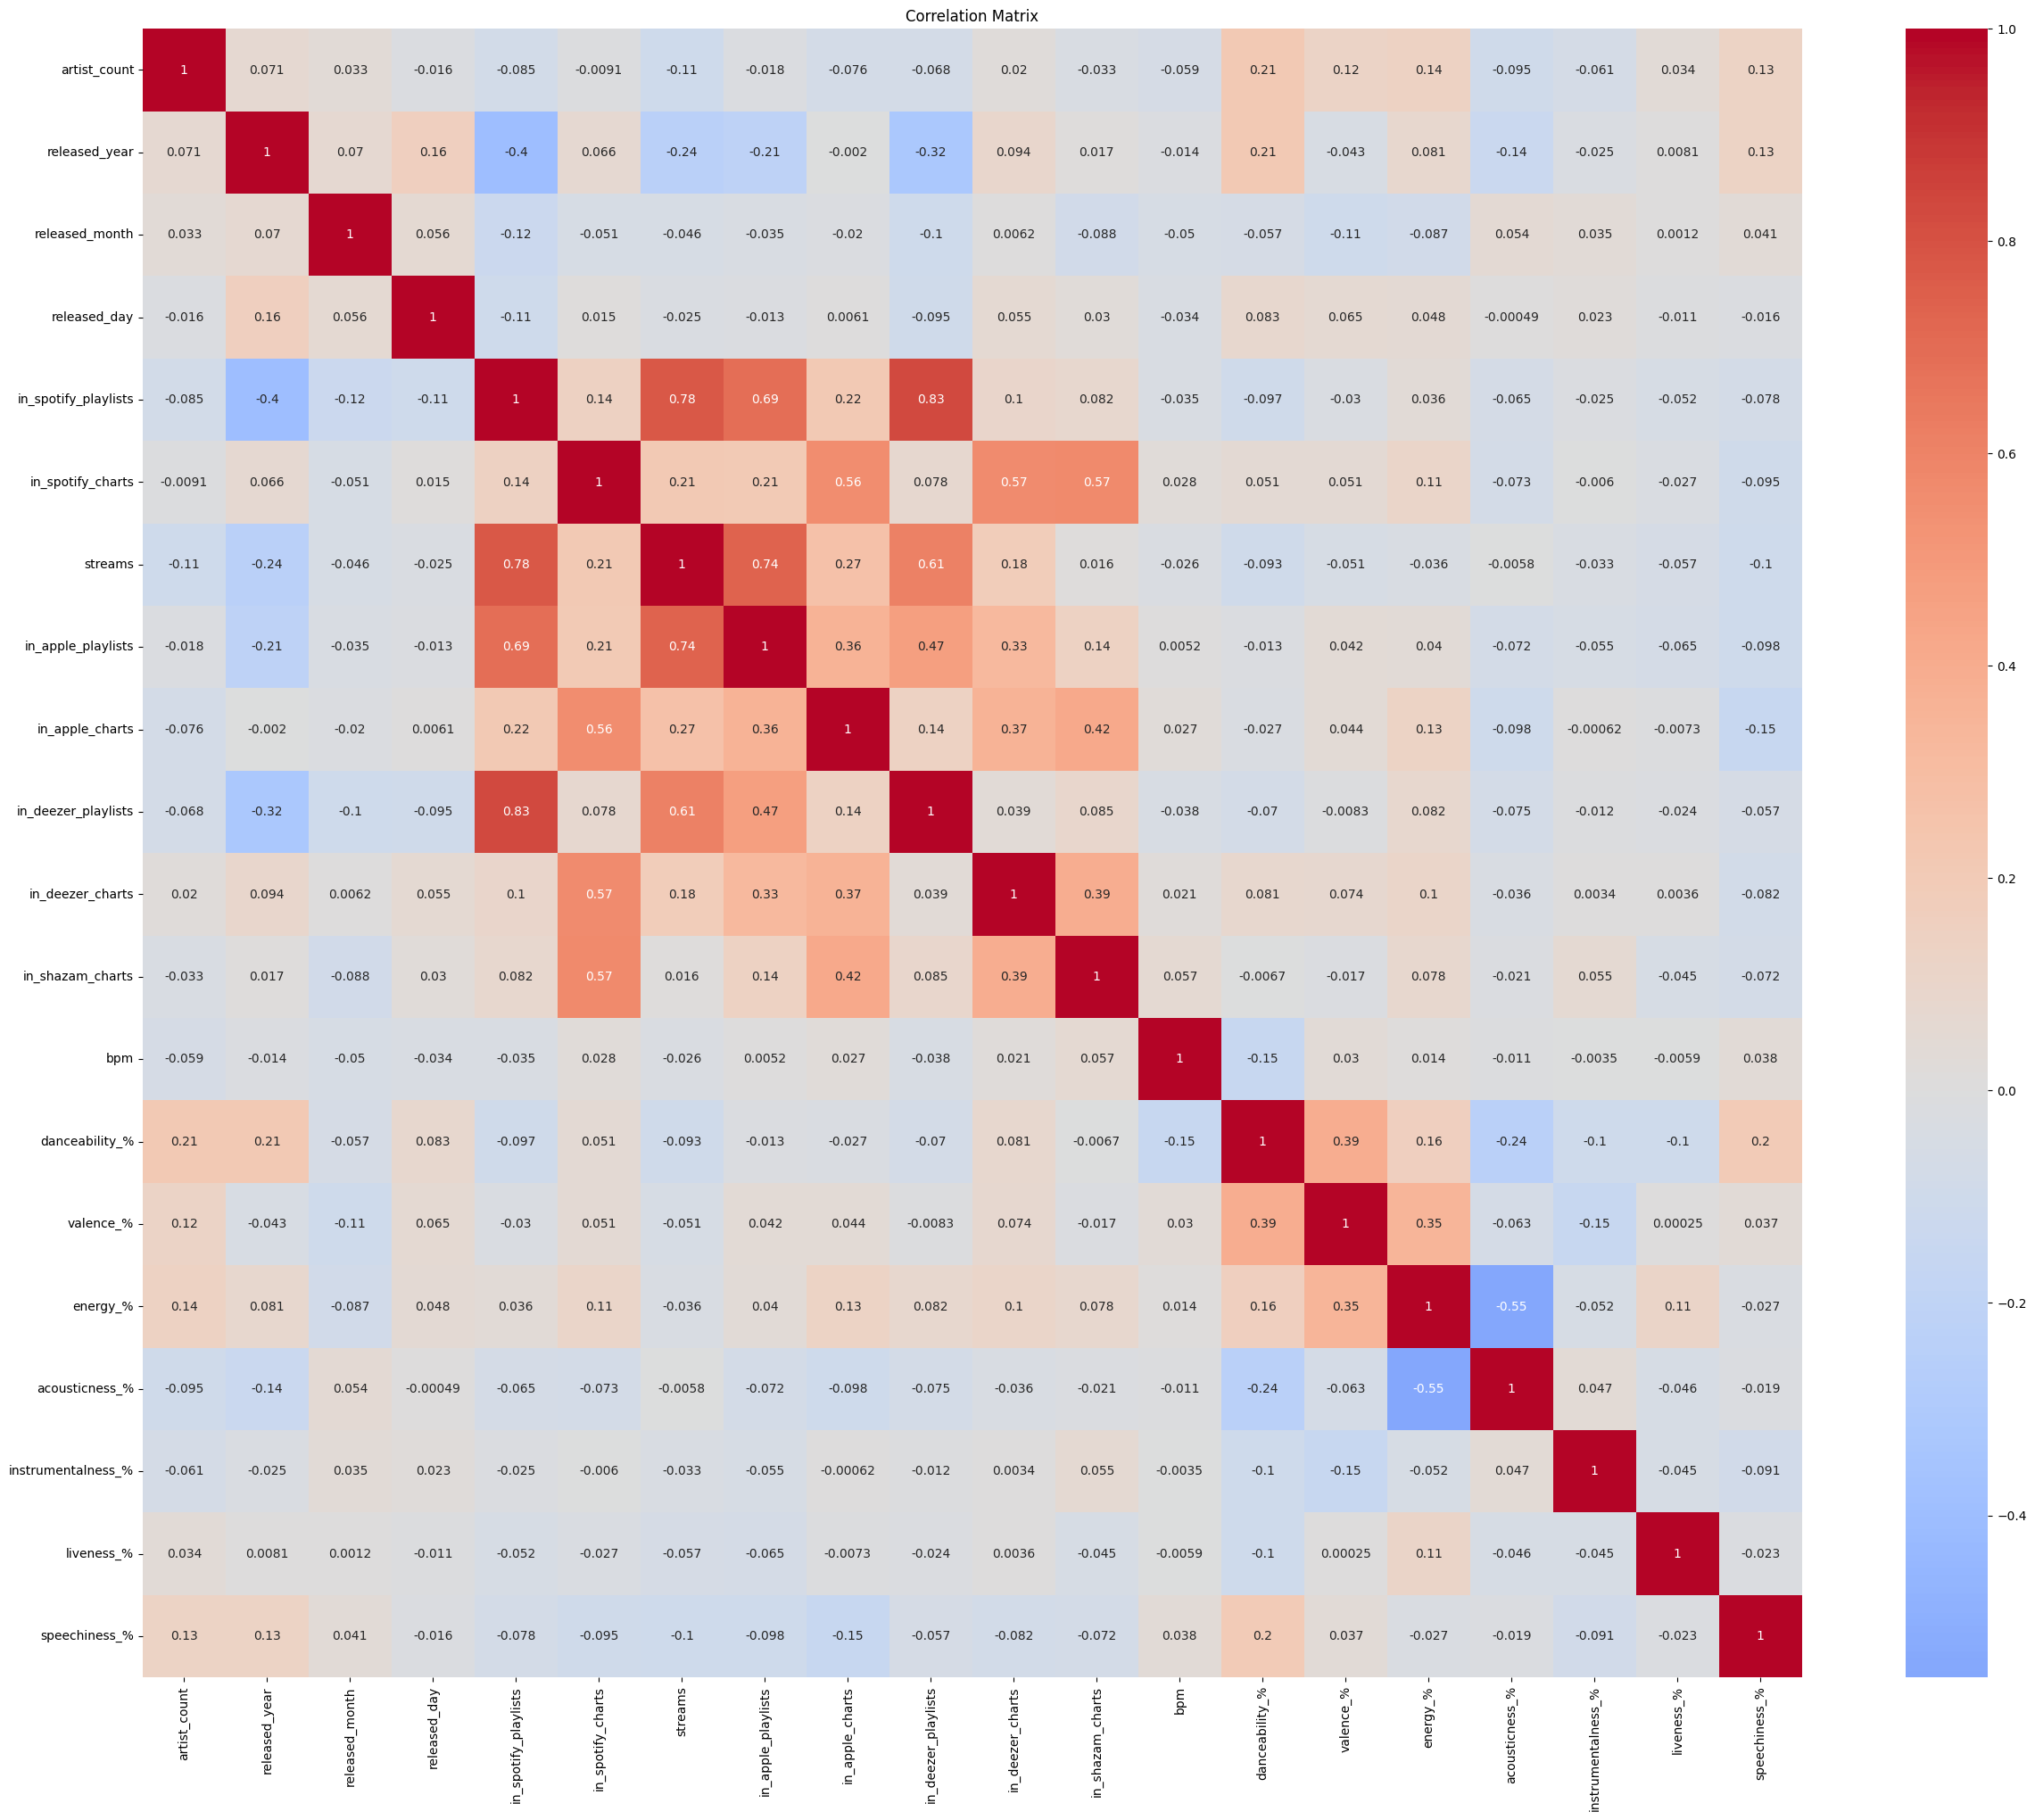

In [76]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [78]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(20))

in_spotify_playlists  in_deezer_playlists    0.829629
                      streams                0.780404
streams               in_apple_playlists     0.735321
in_spotify_playlists  in_apple_playlists     0.688306
streams               in_deezer_playlists    0.610812
in_spotify_charts     in_shazam_charts       0.573956
                      in_deezer_charts       0.566020
                      in_apple_charts        0.556509
in_apple_playlists    in_deezer_playlists    0.468576
in_apple_charts       in_shazam_charts       0.419483
danceability_%        valence_%              0.391414
in_deezer_charts      in_shazam_charts       0.389482
in_apple_charts       in_deezer_charts       0.366295
in_apple_playlists    in_apple_charts        0.364339
valence_%             energy_%               0.349616
in_apple_playlists    in_deezer_charts       0.326598
streams               in_apple_charts        0.269137
in_spotify_playlists  in_apple_charts        0.215504
in_spotify_charts     stream

In [79]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

released_year    acousticness_%         -0.139154
valence_%        instrumentalness_%     -0.146891
in_apple_charts  speechiness_%          -0.147513
bpm              danceability_%         -0.148816
released_year    in_apple_playlists     -0.207317
danceability_%   acousticness_%         -0.241593
released_year    streams                -0.242726
                 in_deezer_playlists    -0.321621
                 in_spotify_playlists   -0.397052
energy_%         acousticness_%         -0.552592
dtype: float64

In [83]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(10)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(10)

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]

to_analyze = []
to_analyze.extend(sorted_pairs.index)
to_analyze.extend(inv_sorted_pairs.index)

to_analyze

[('in_deezer_playlists', 'in_spotify_playlists'),
 ('streams', 'in_spotify_playlists'),
 ('in_apple_playlists', 'streams'),
 ('in_apple_playlists', 'in_spotify_playlists'),
 ('in_deezer_playlists', 'streams'),
 ('in_shazam_charts', 'in_spotify_charts'),
 ('in_deezer_charts', 'in_spotify_charts'),
 ('in_apple_charts', 'in_spotify_charts'),
 ('in_deezer_playlists', 'in_apple_playlists'),
 ('in_shazam_charts', 'in_apple_charts'),
 ('acousticness_%', 'released_year'),
 ('instrumentalness_%', 'valence_%'),
 ('speechiness_%', 'in_apple_charts'),
 ('danceability_%', 'bpm'),
 ('in_apple_playlists', 'released_year'),
 ('acousticness_%', 'danceability_%'),
 ('streams', 'released_year'),
 ('in_deezer_playlists', 'released_year'),
 ('in_spotify_playlists', 'released_year'),
 ('acousticness_%', 'energy_%')]

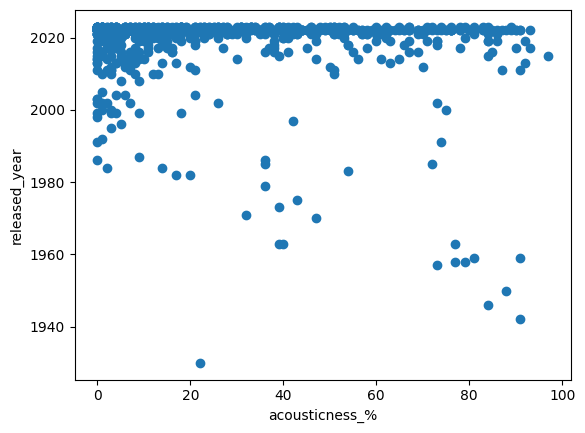

<Figure size 800x600 with 0 Axes>

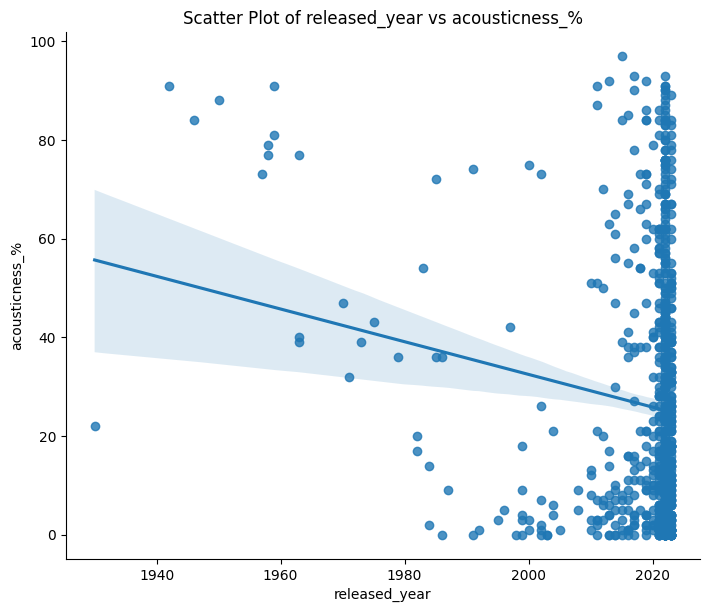

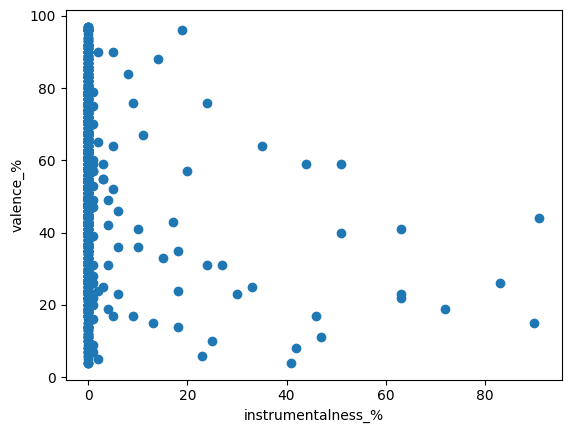

<Figure size 800x600 with 0 Axes>

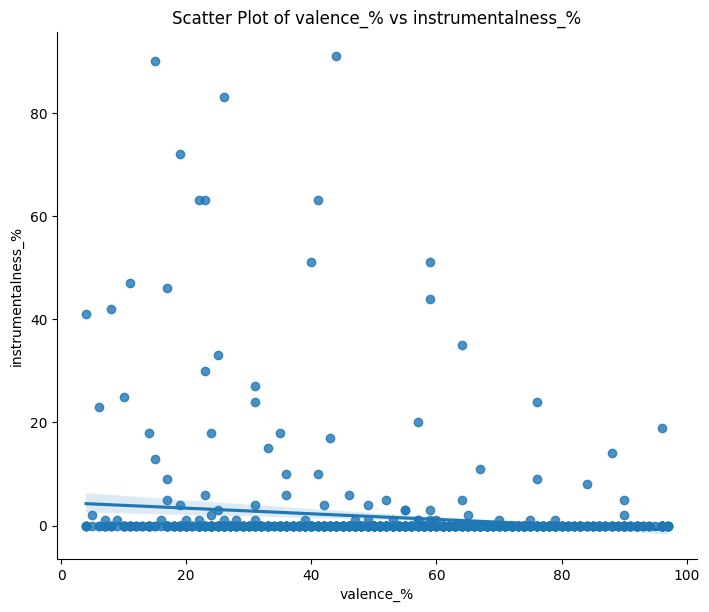

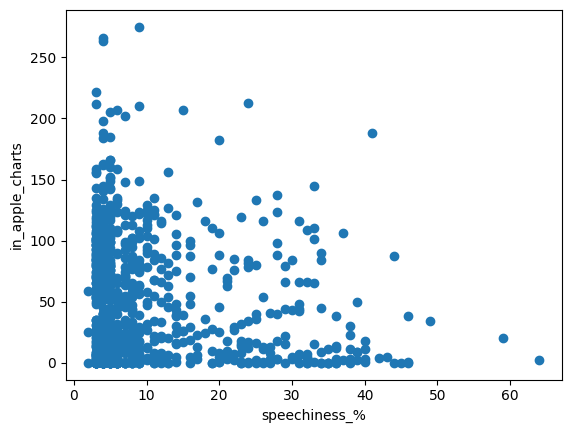

<Figure size 800x600 with 0 Axes>

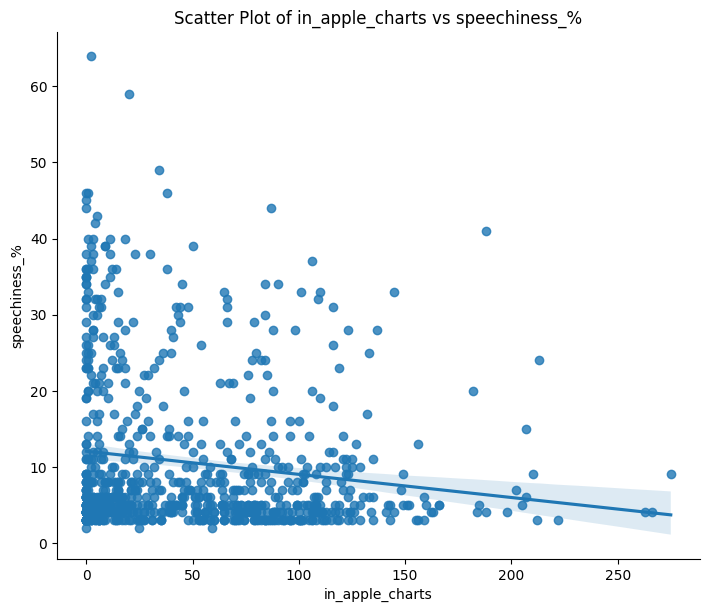

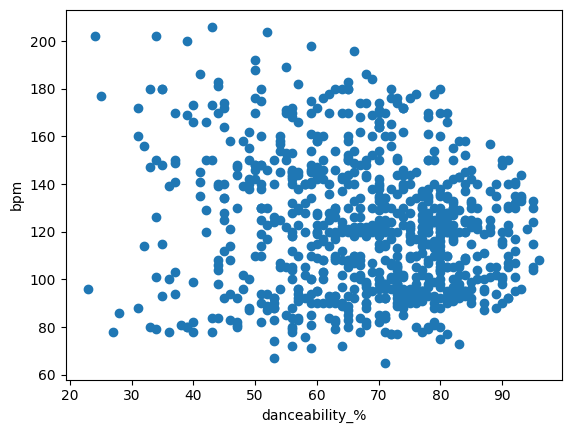

<Figure size 800x600 with 0 Axes>

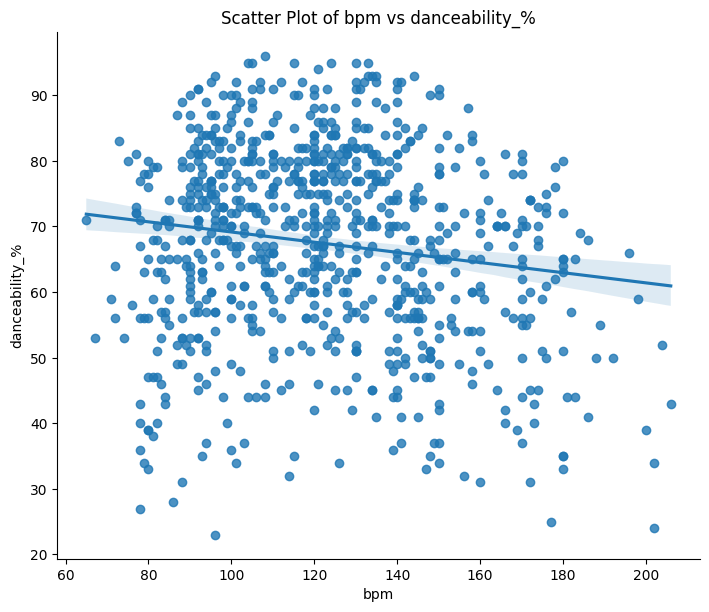

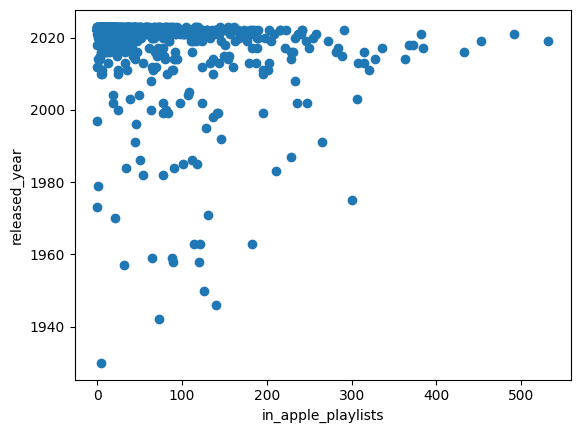

<Figure size 800x600 with 0 Axes>

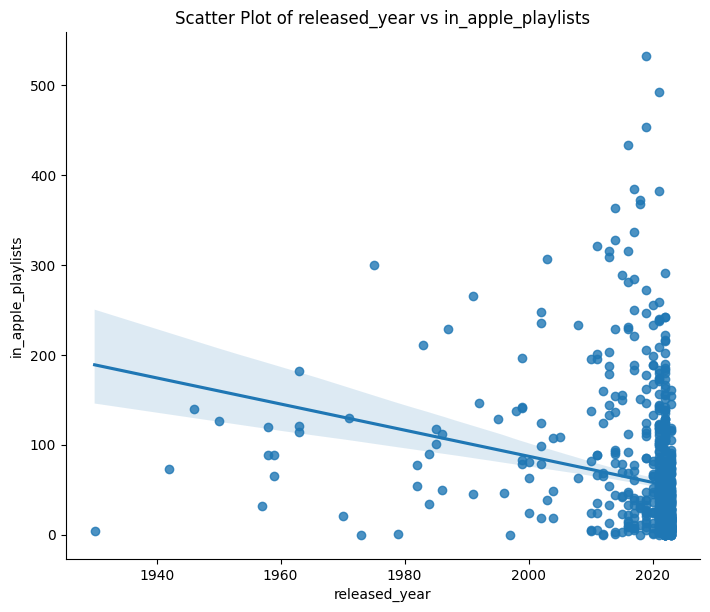

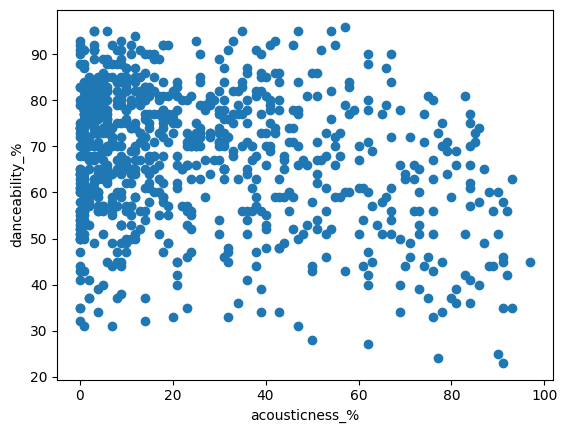

<Figure size 800x600 with 0 Axes>

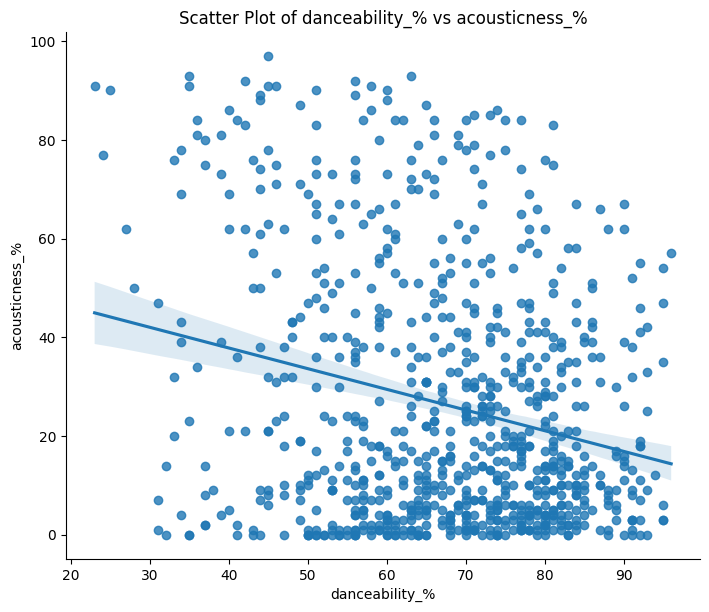

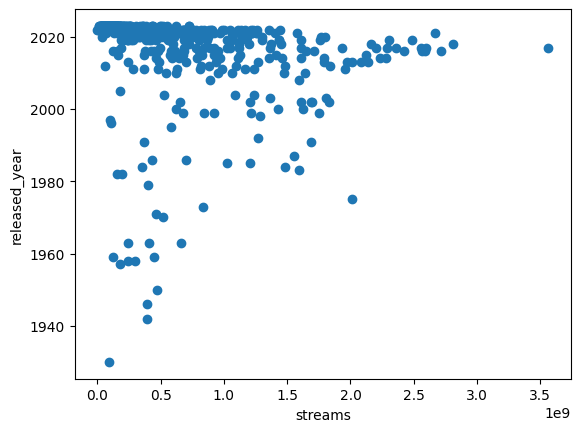

<Figure size 800x600 with 0 Axes>

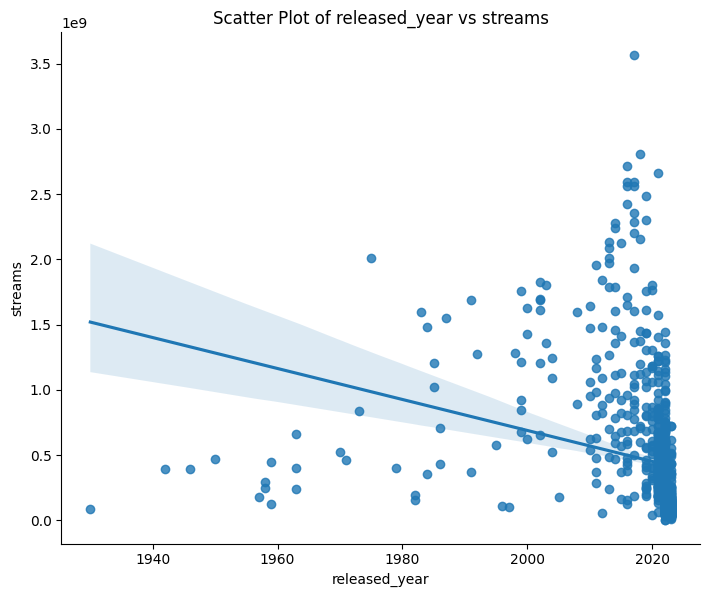

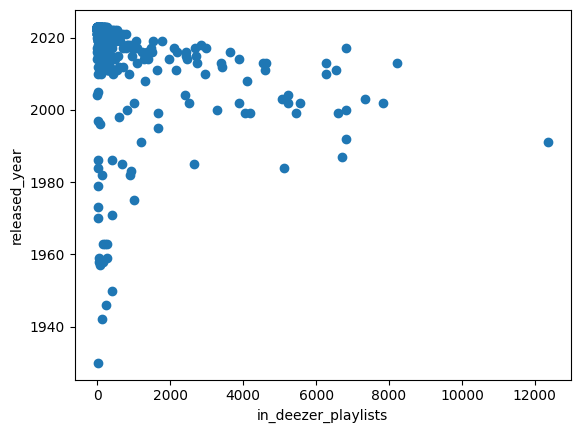

<Figure size 800x600 with 0 Axes>

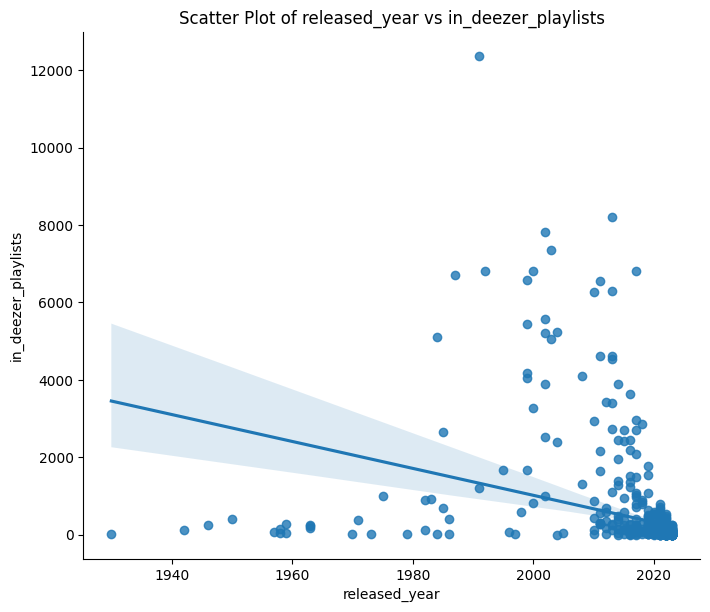

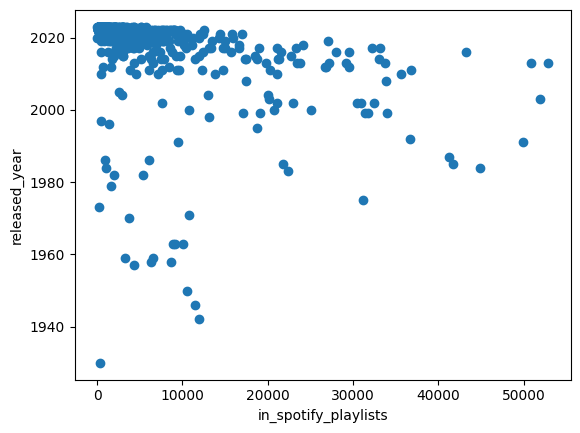

<Figure size 800x600 with 0 Axes>

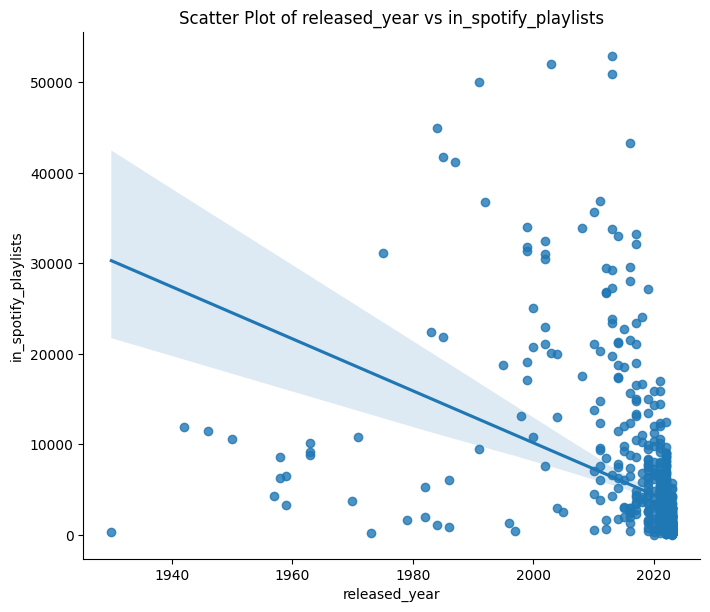

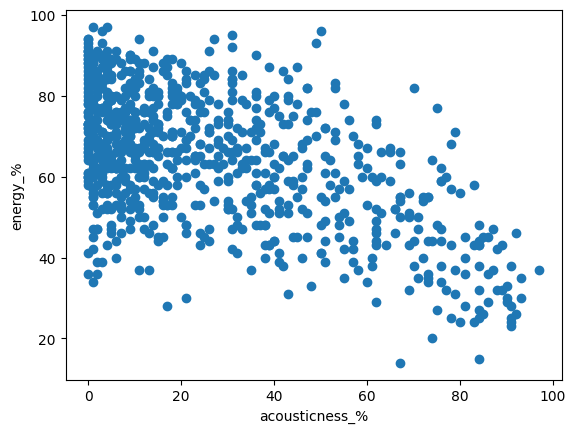

<Figure size 800x600 with 0 Axes>

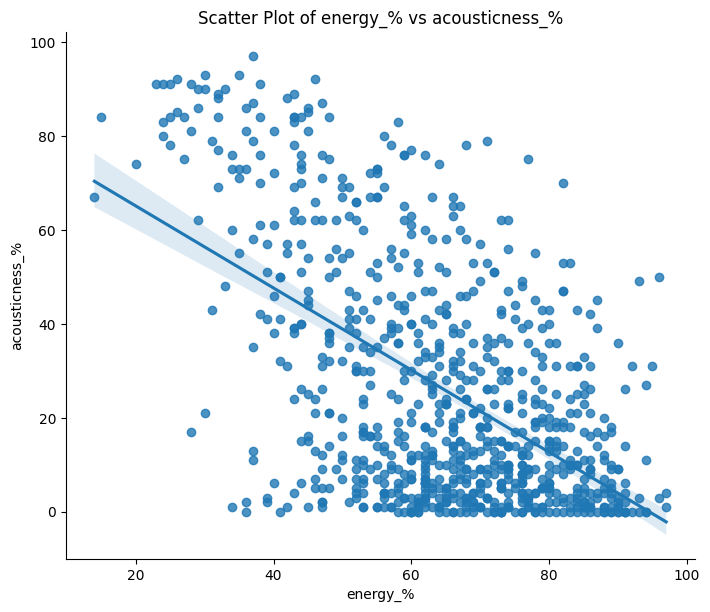

In [84]:
for (var2, var1) in inv_top_pairs:
    plt.scatter(data[var2], data[var1])
    plt.xlabel(var2)
    plt.ylabel(var1)
    # plt.title('Simple Scatterplot')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

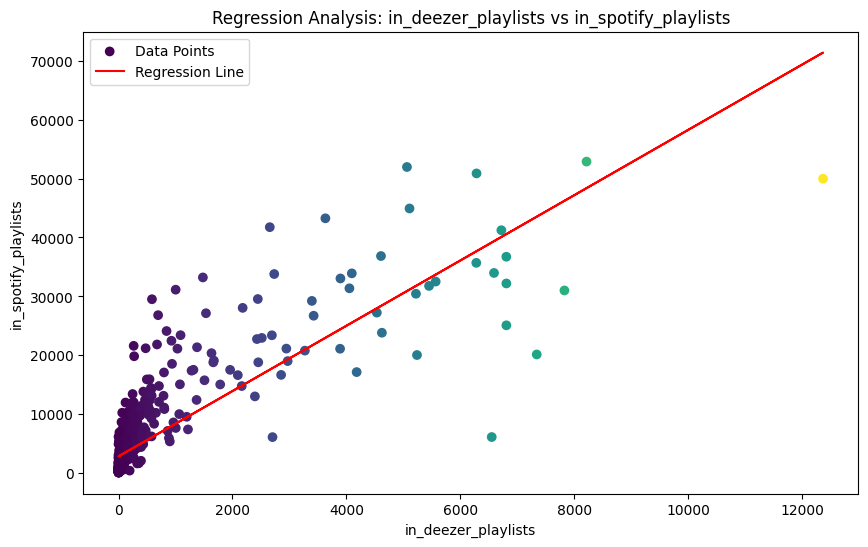

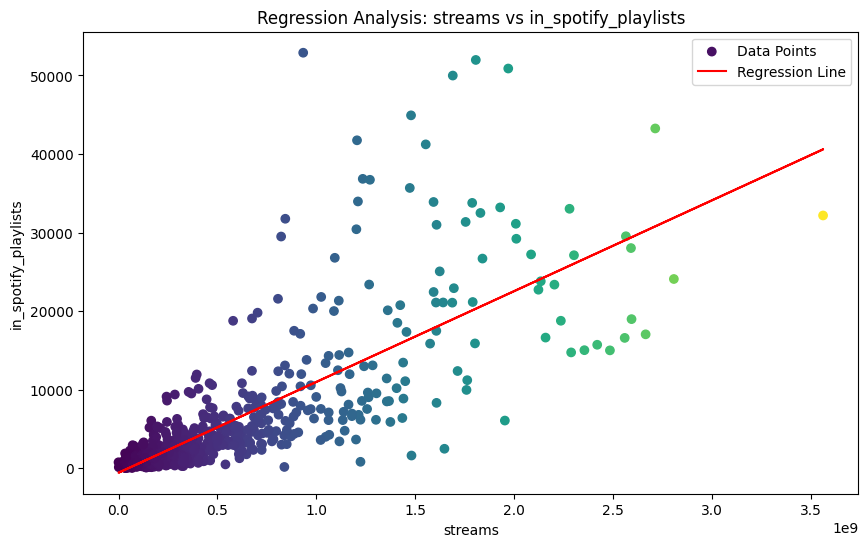

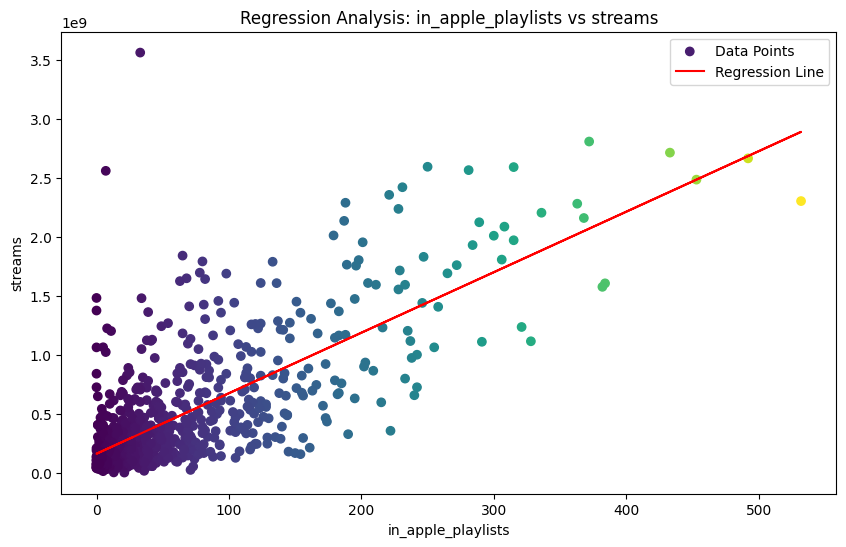

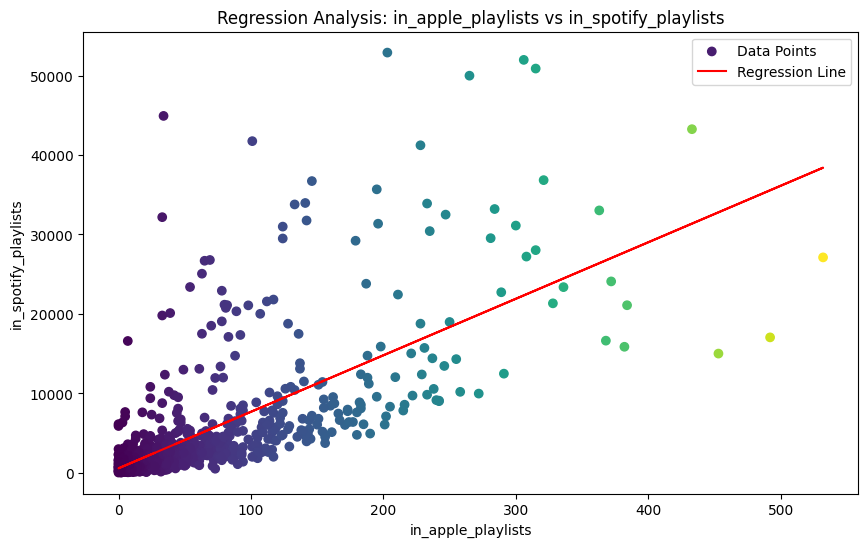

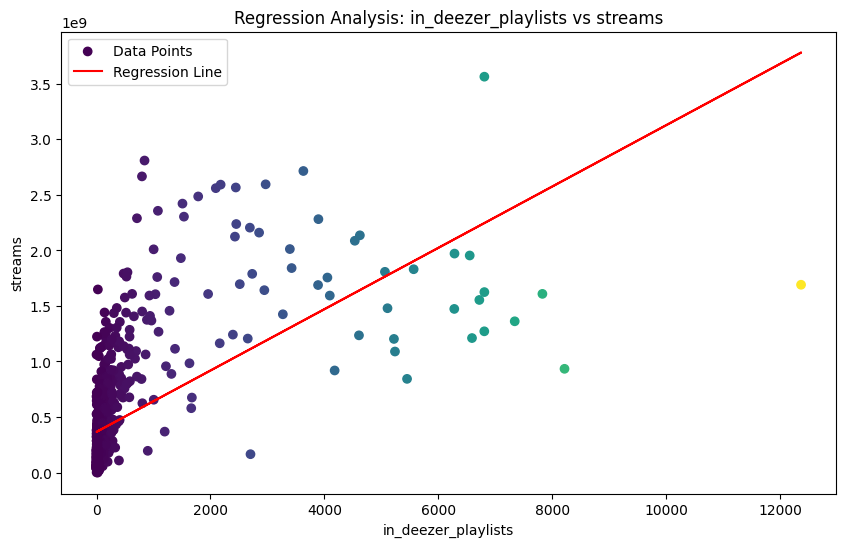

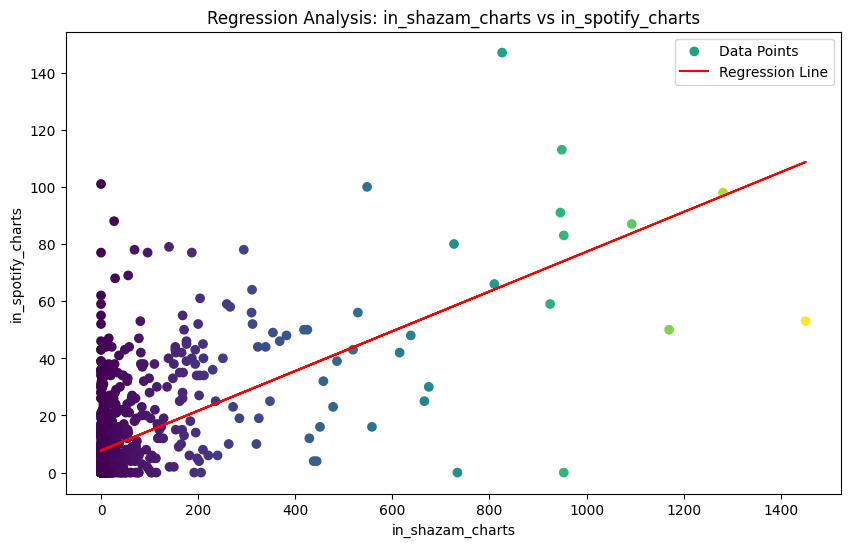

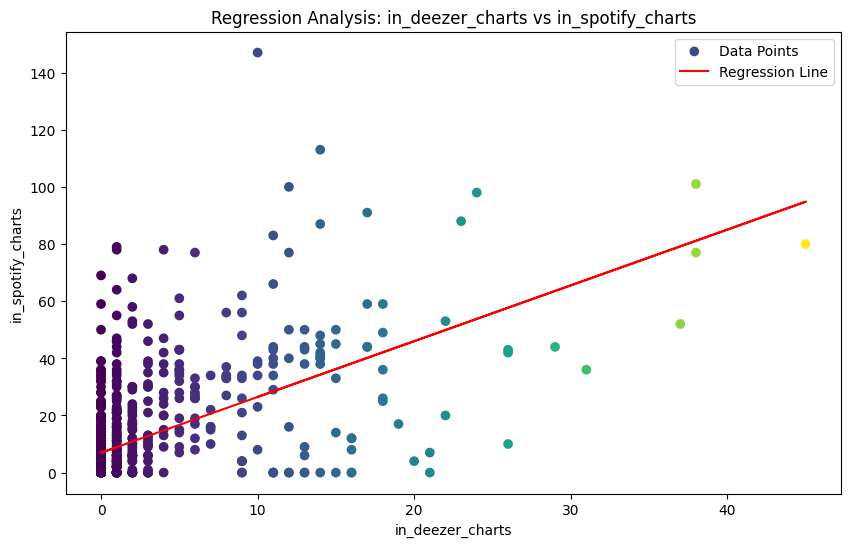

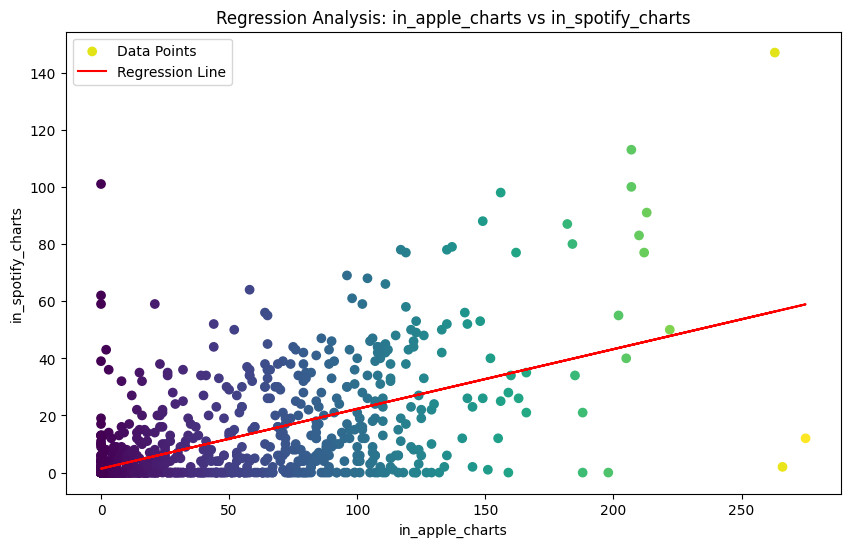

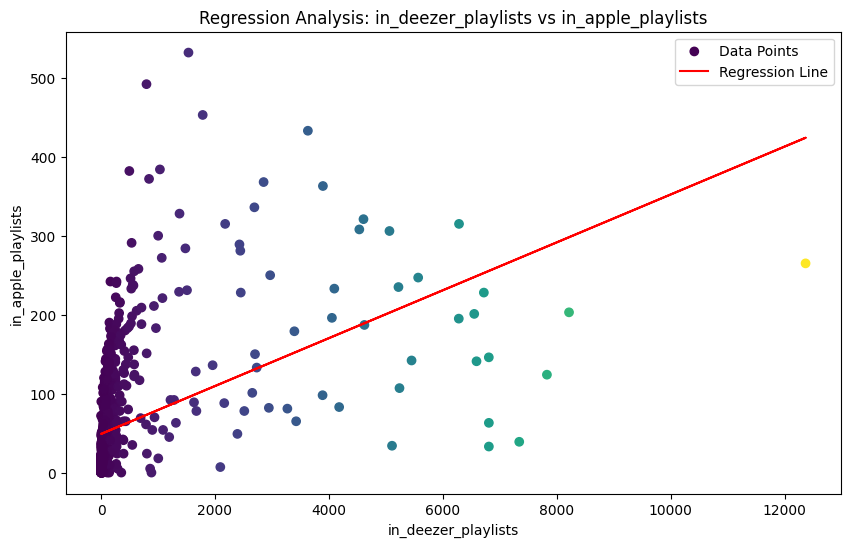

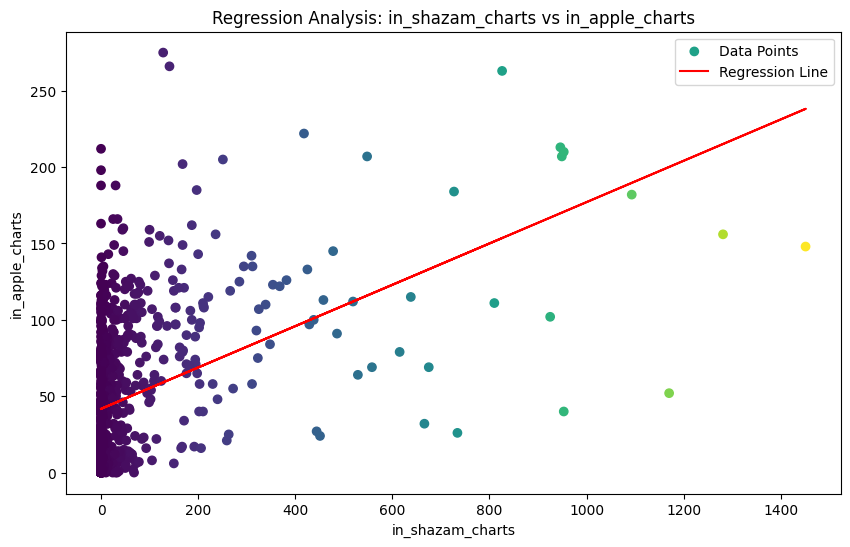

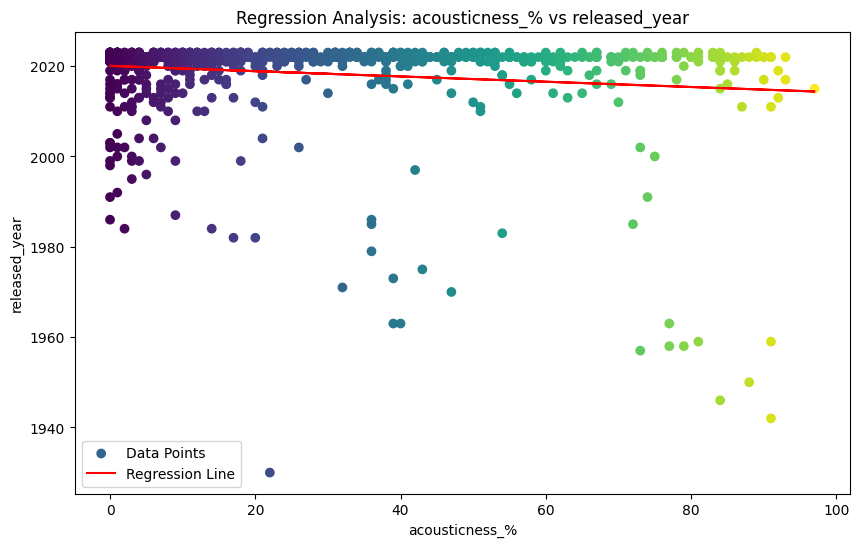

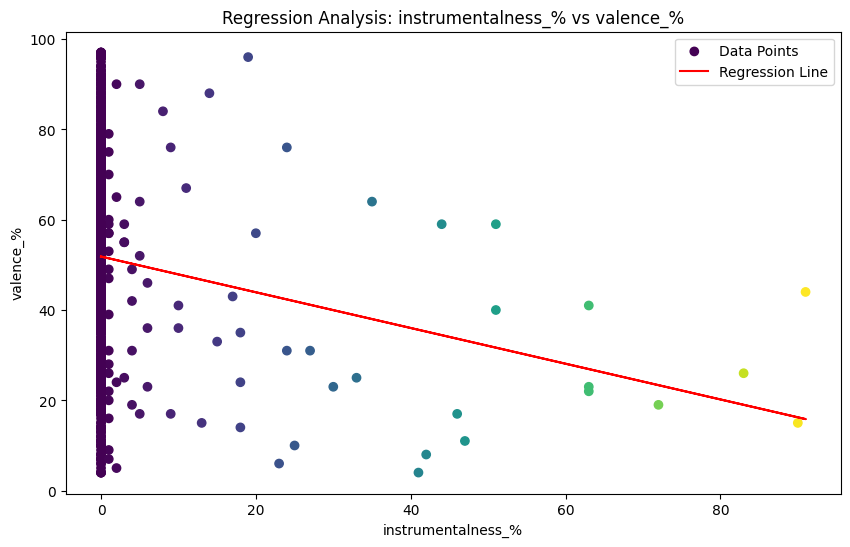

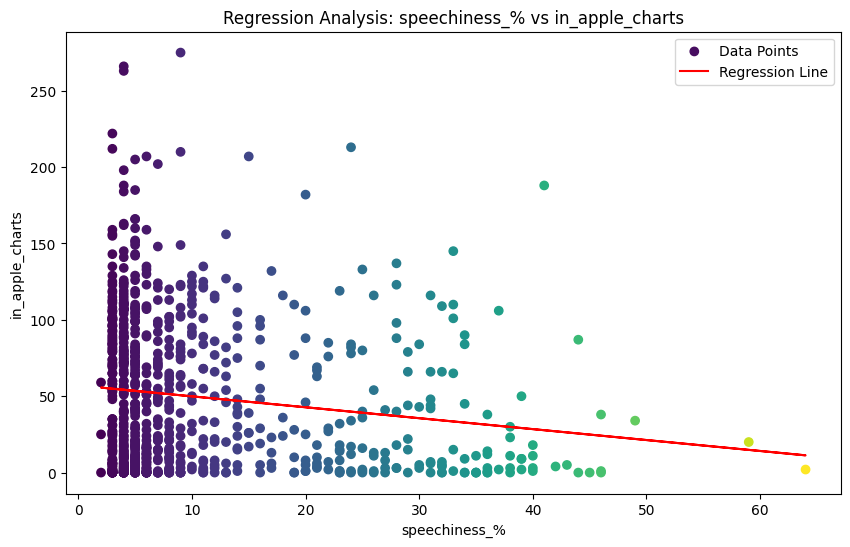

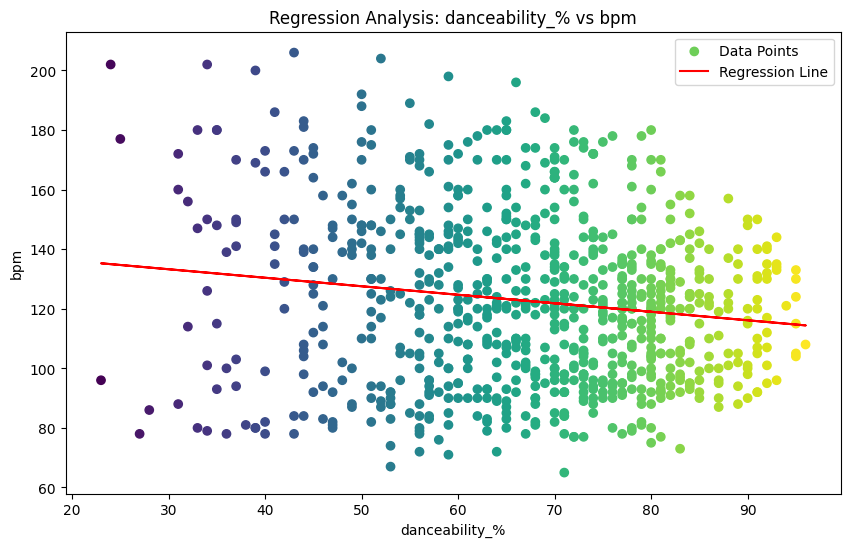

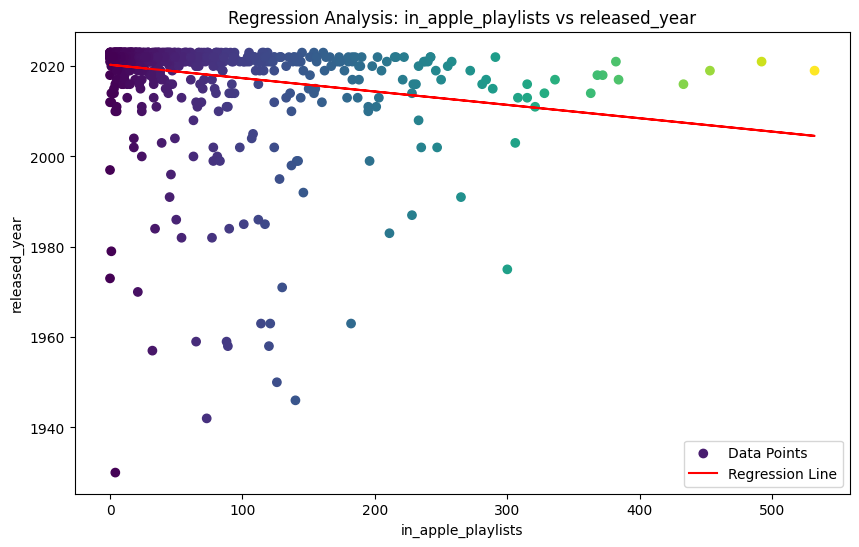

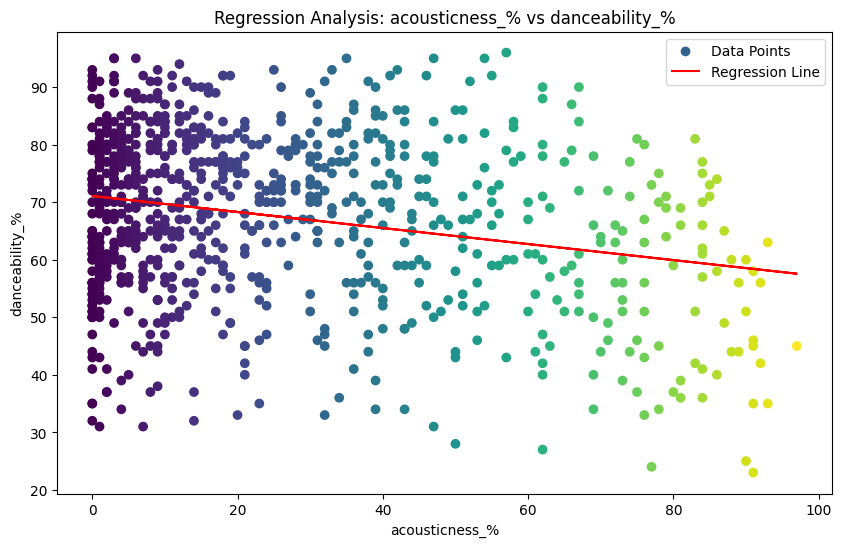

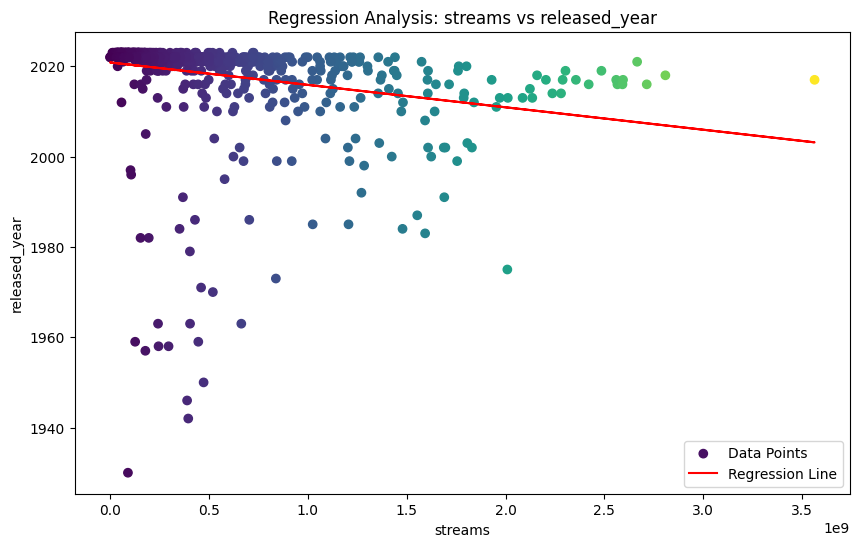

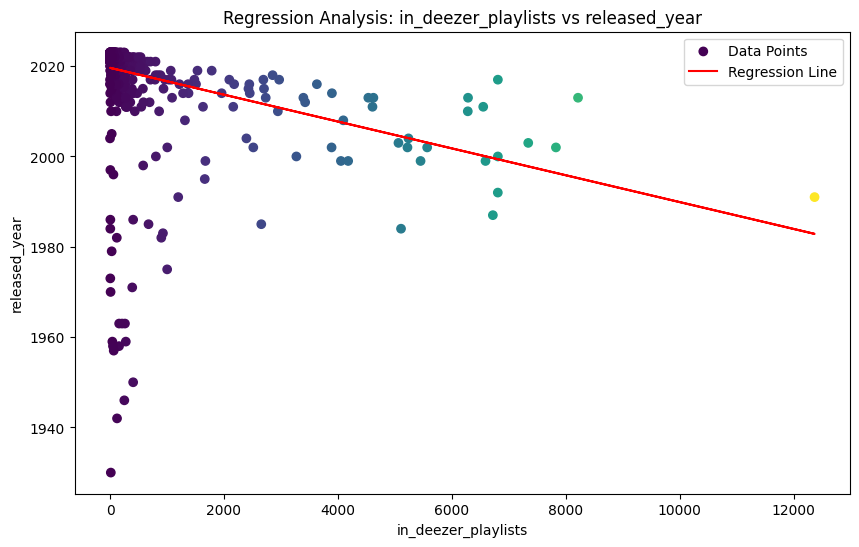

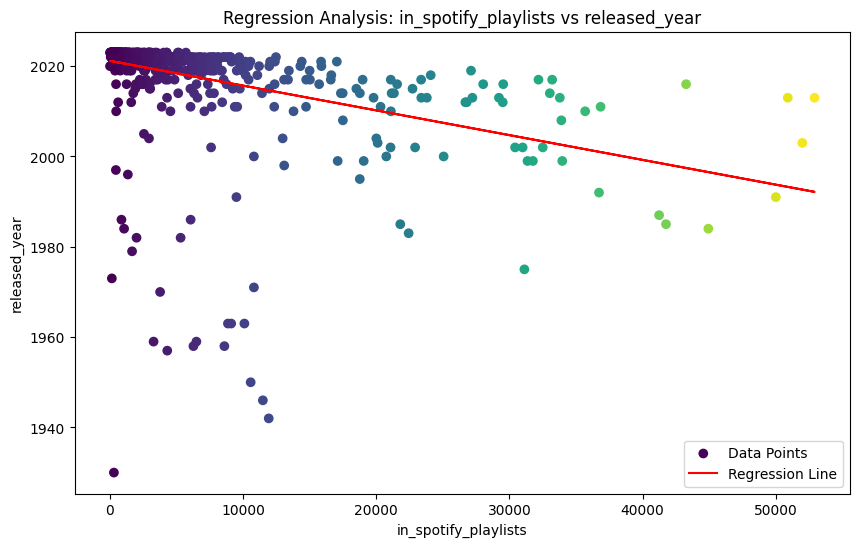

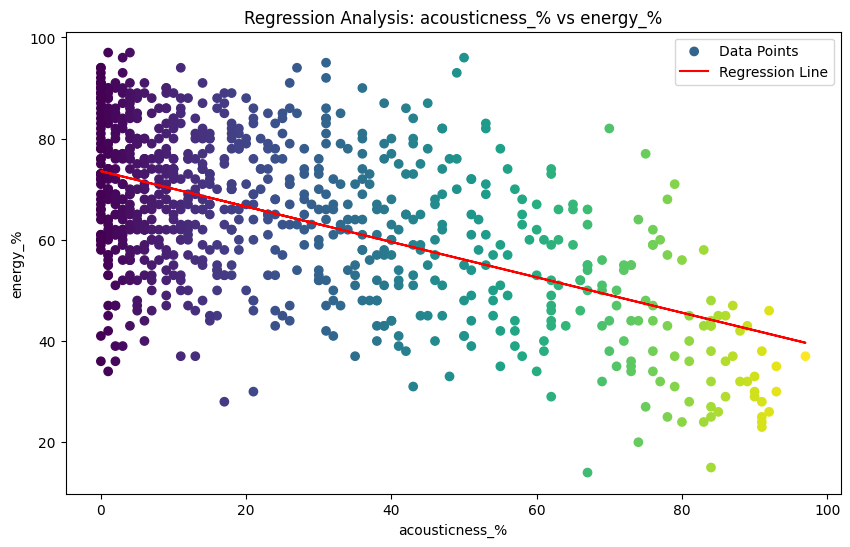

In [90]:
# Perform regression analysis on the best pairs

for (var1, var2) in to_analyze:
    X = data[[var1]]
    y = data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    # print(f"Regression analysis for {var1} and {var2}:")
    # print(model.summary())
    # print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(data[var1], data[var2], c=data[var1], label='Data Points')
    plt.plot(data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()

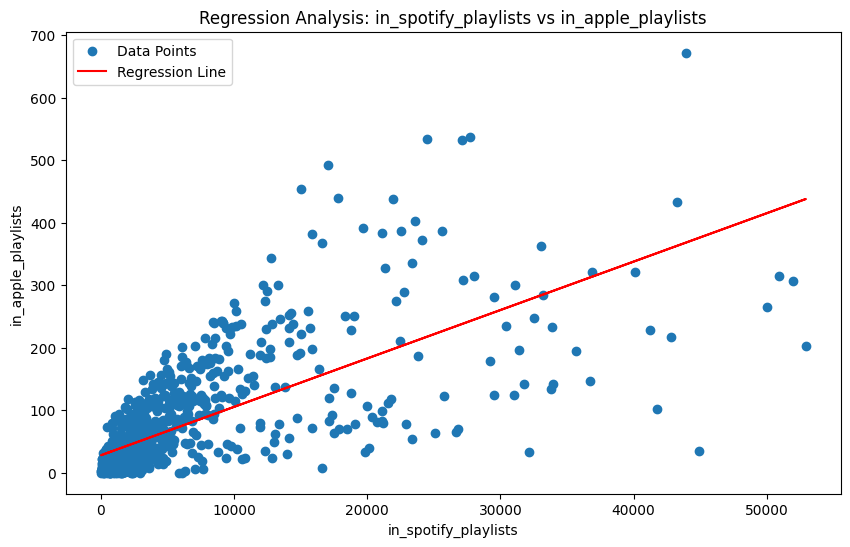

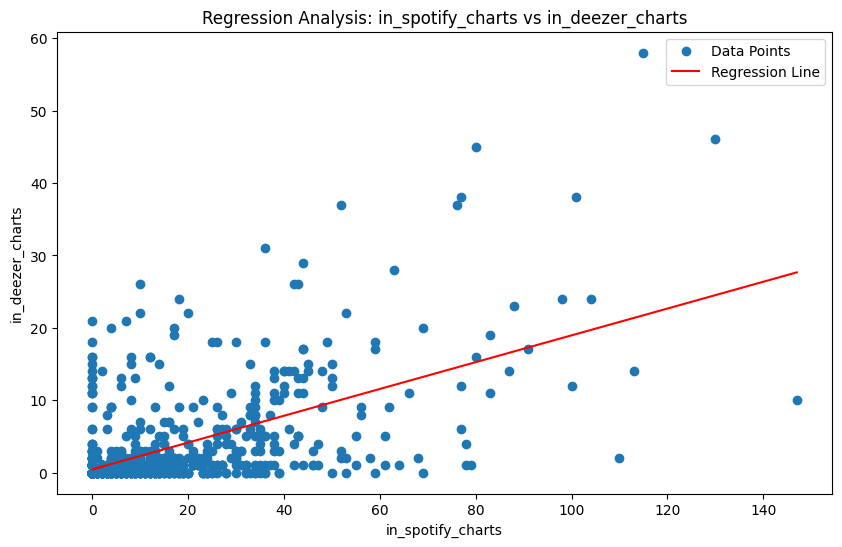

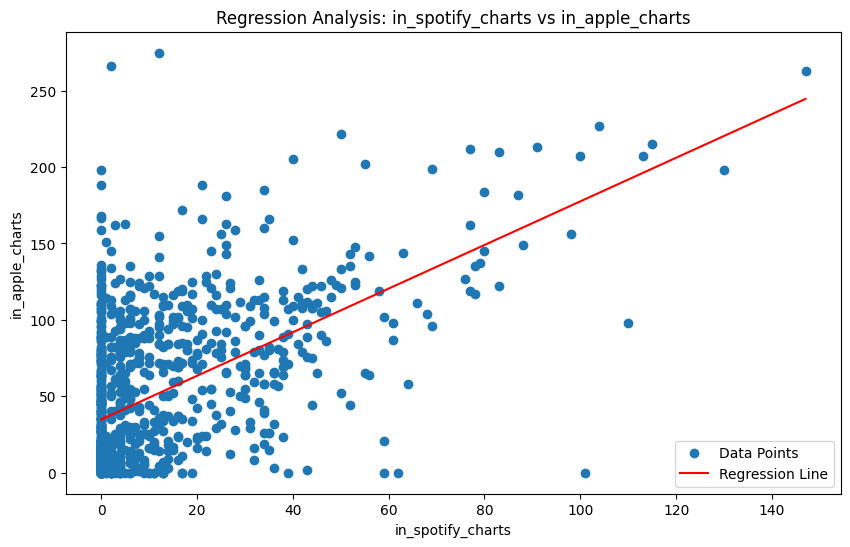

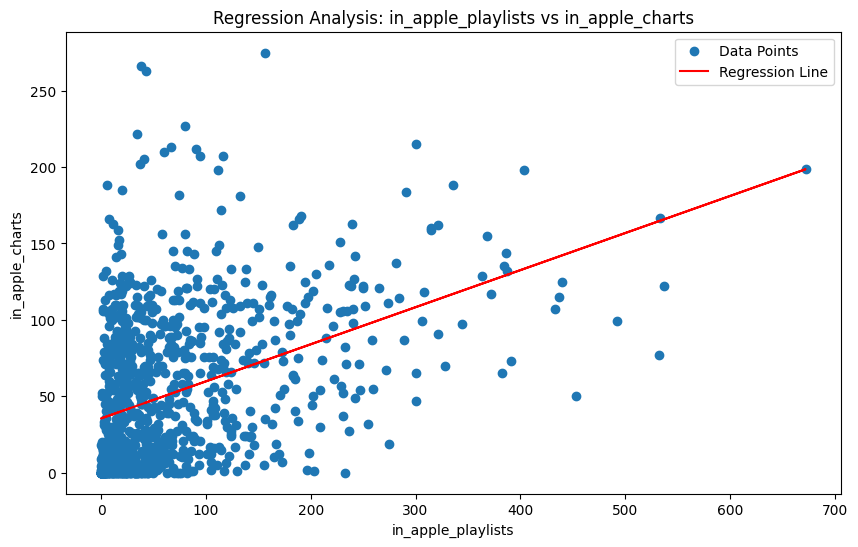

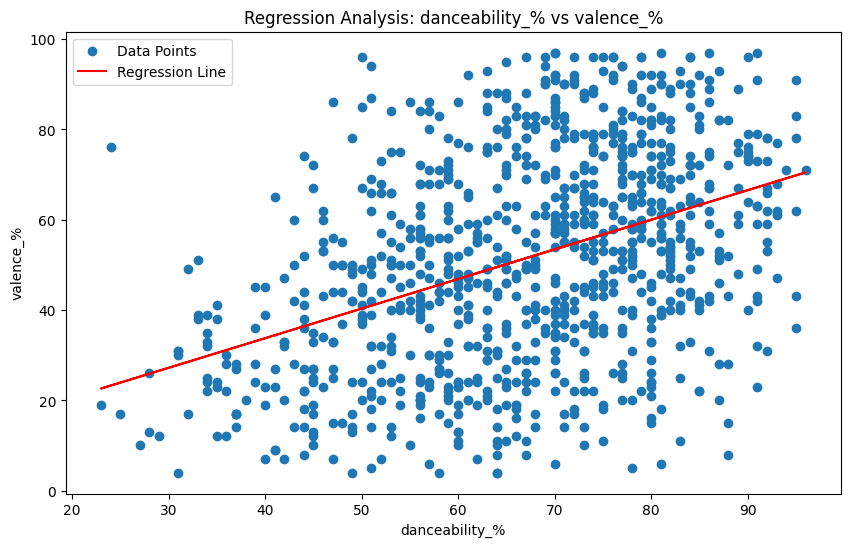

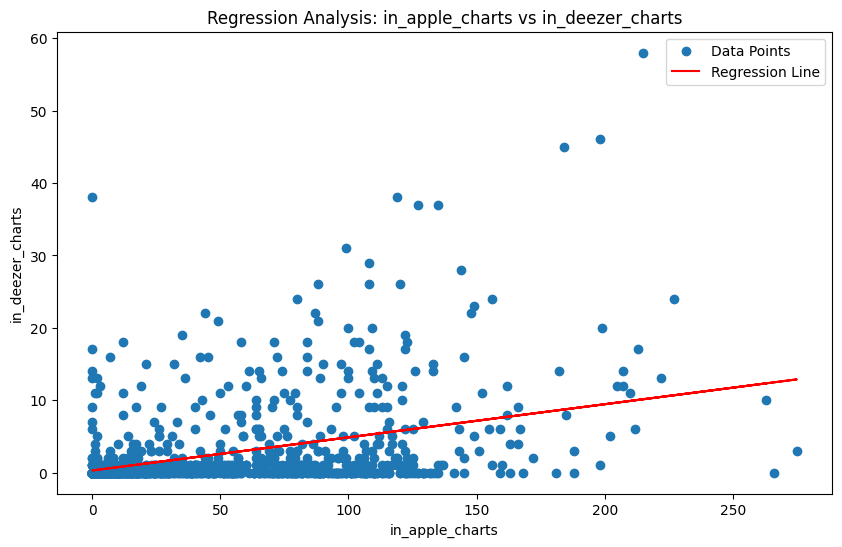

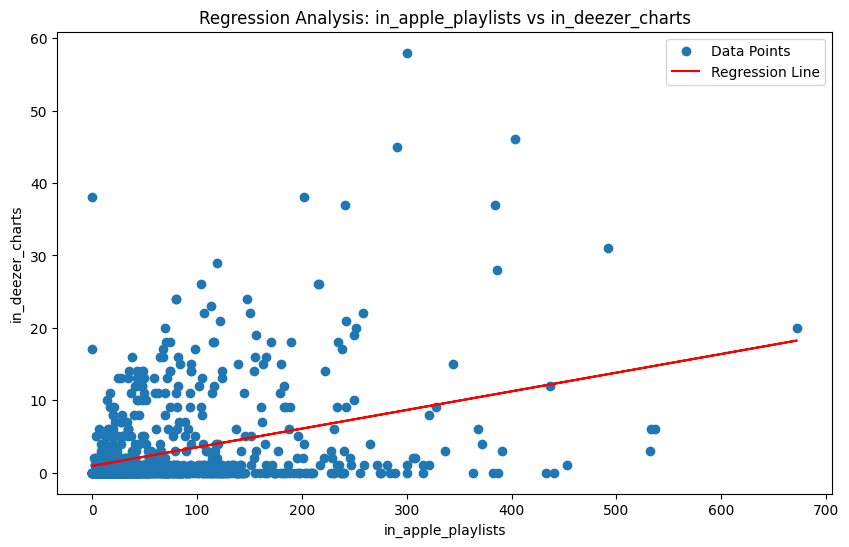

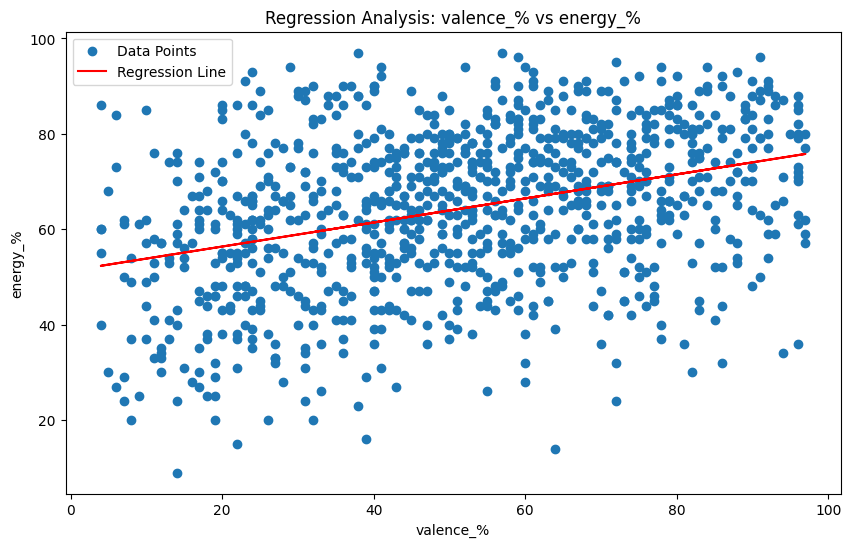

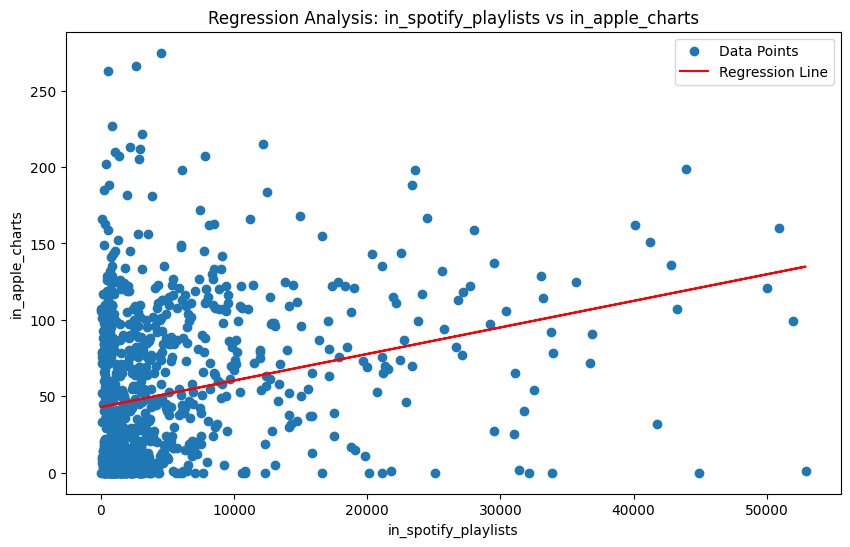

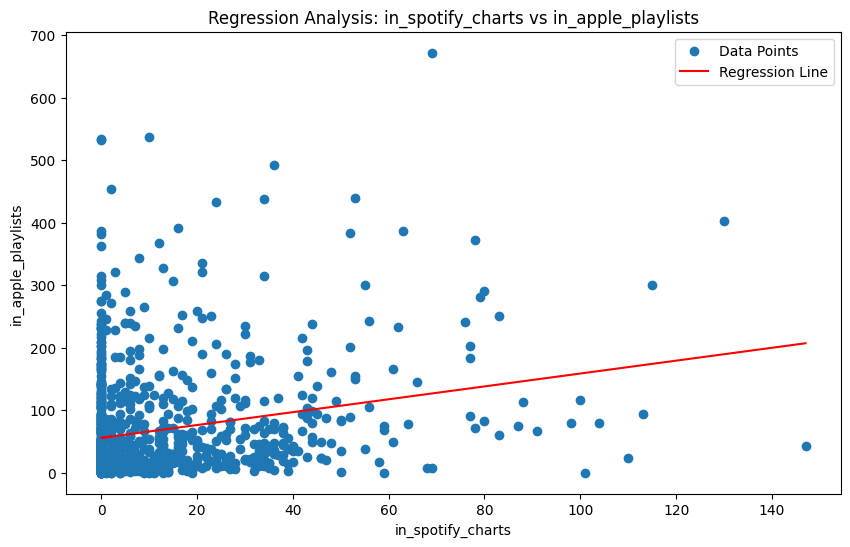

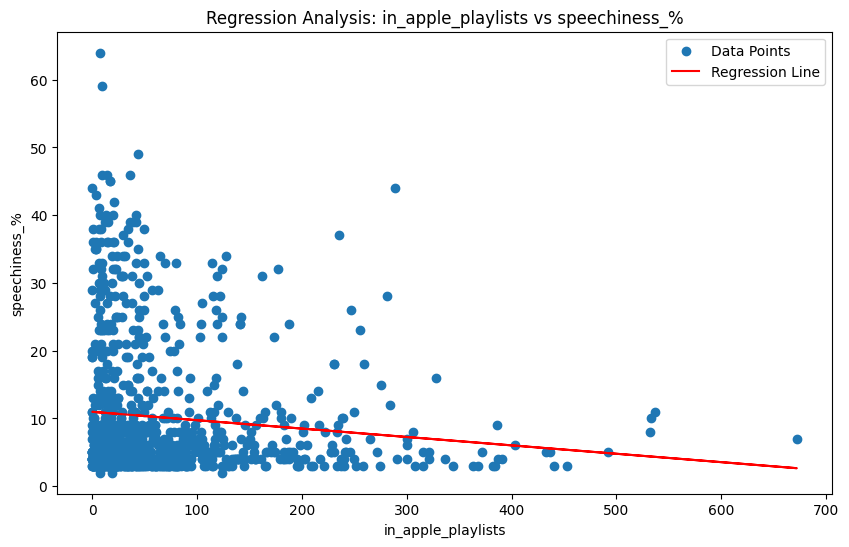

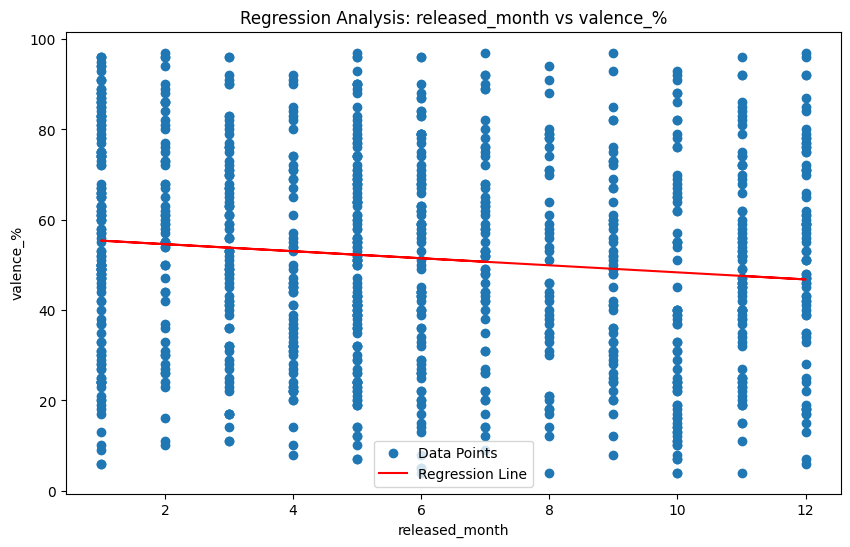

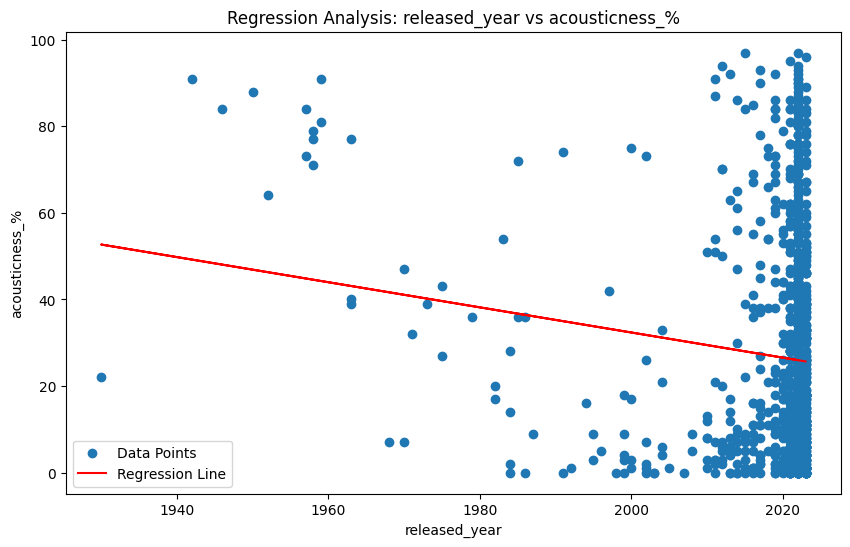

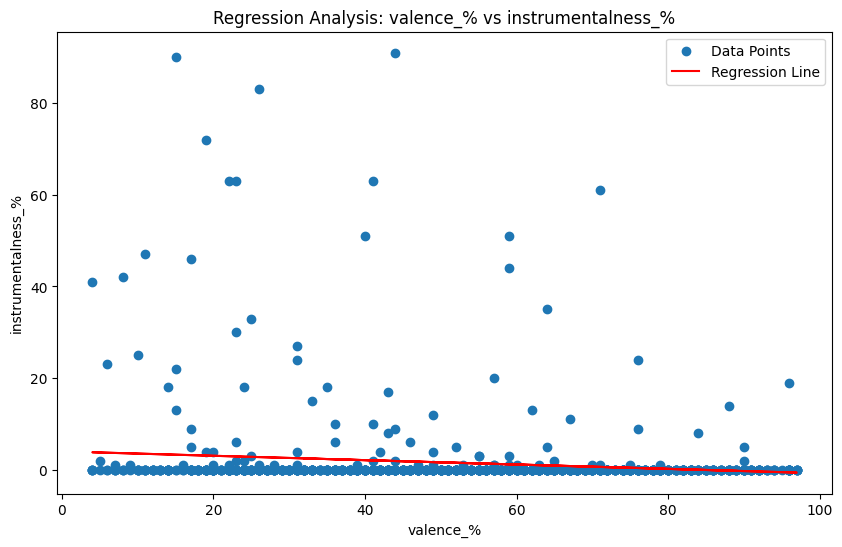

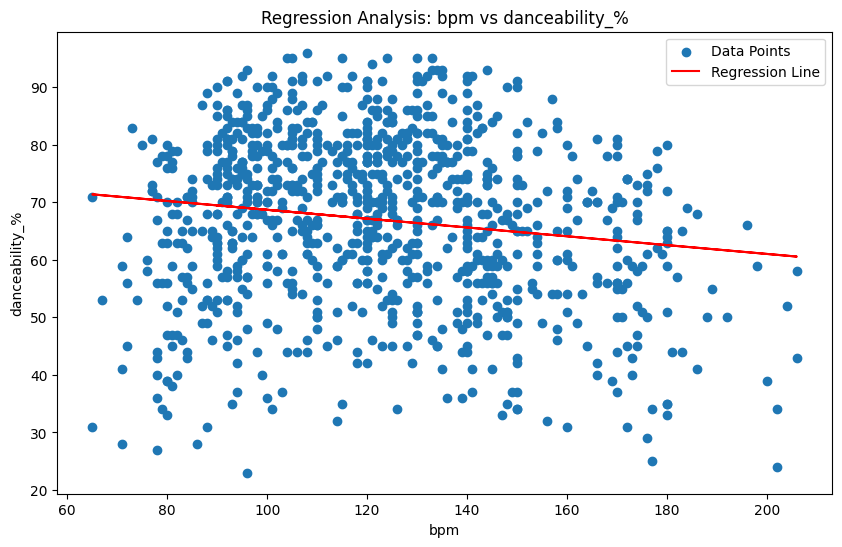

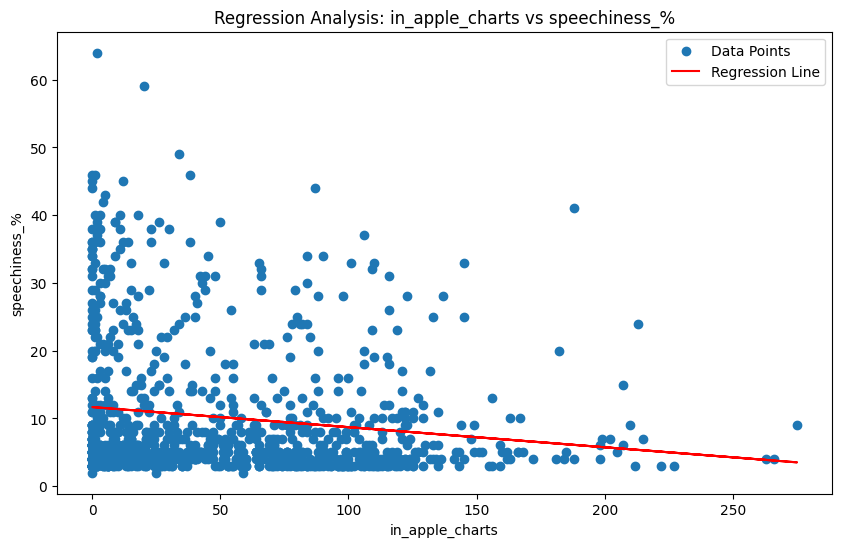

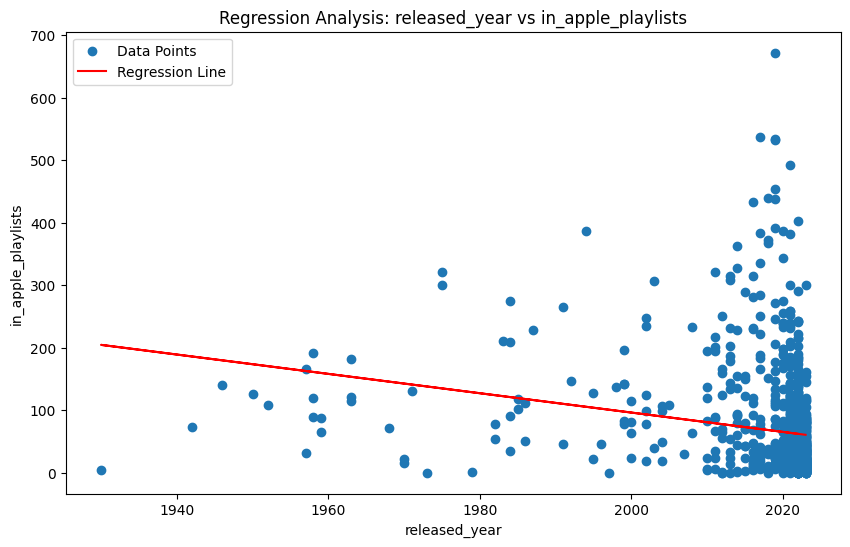

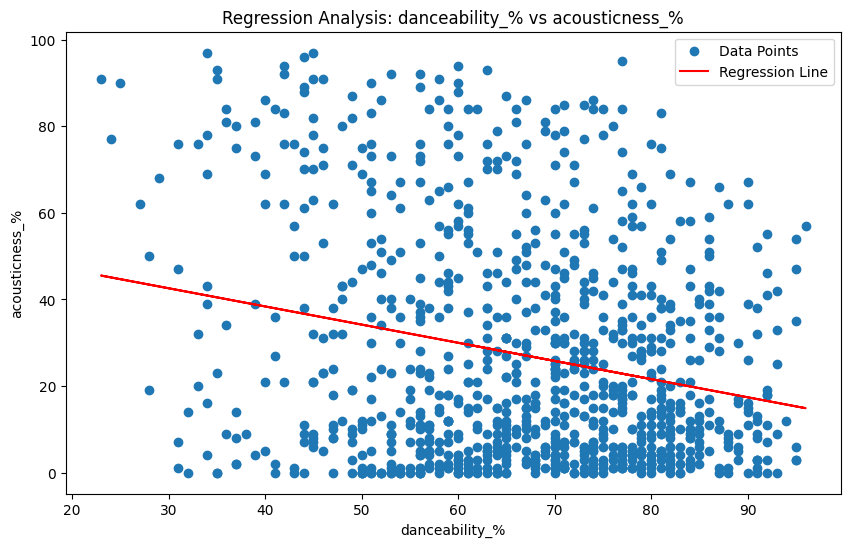

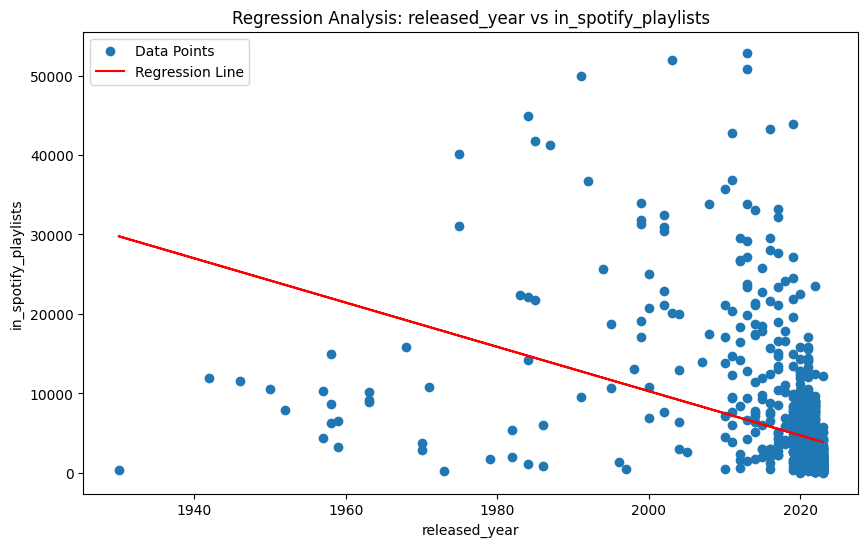

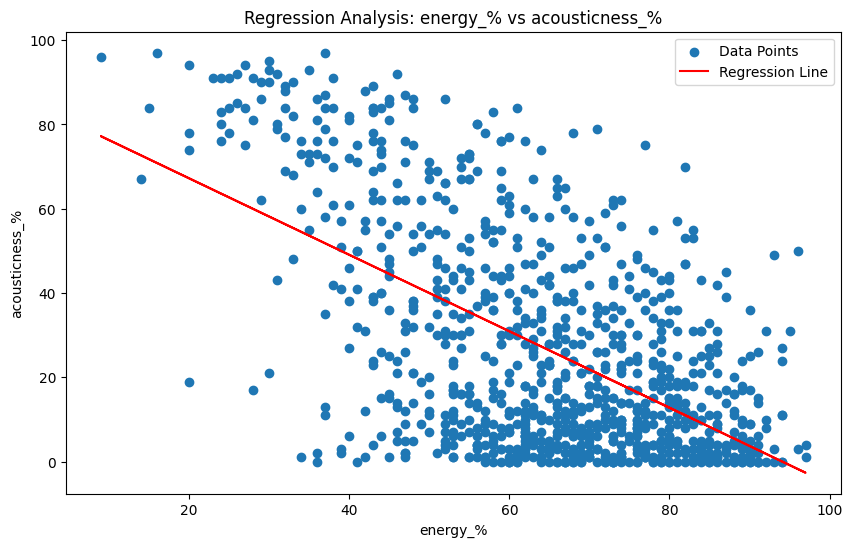

In [ ]:
# Perform regression analysis on the best pairs

for (var2, var1) in to_analyze:
    X = data[[var1]]
    y = data[var2]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    # print(f"Regression analysis for {var1} and {var2}:")
    # print(model.summary())
    # print()

    # Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    plt.scatter(data[var1], data[var2], label='Data Points')
    plt.plot(data[var1], model.predict(X), color='red', label='Regression Line')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Regression Analysis: {var1} vs {var2}')
    plt.legend()
    plt.show()

In [62]:
# Normalize the numeric columns
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]


df_numeric = data[numeric_cols]

# Normalize the numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

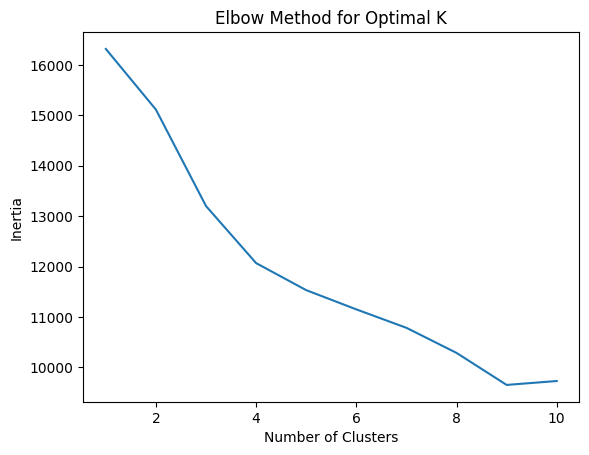

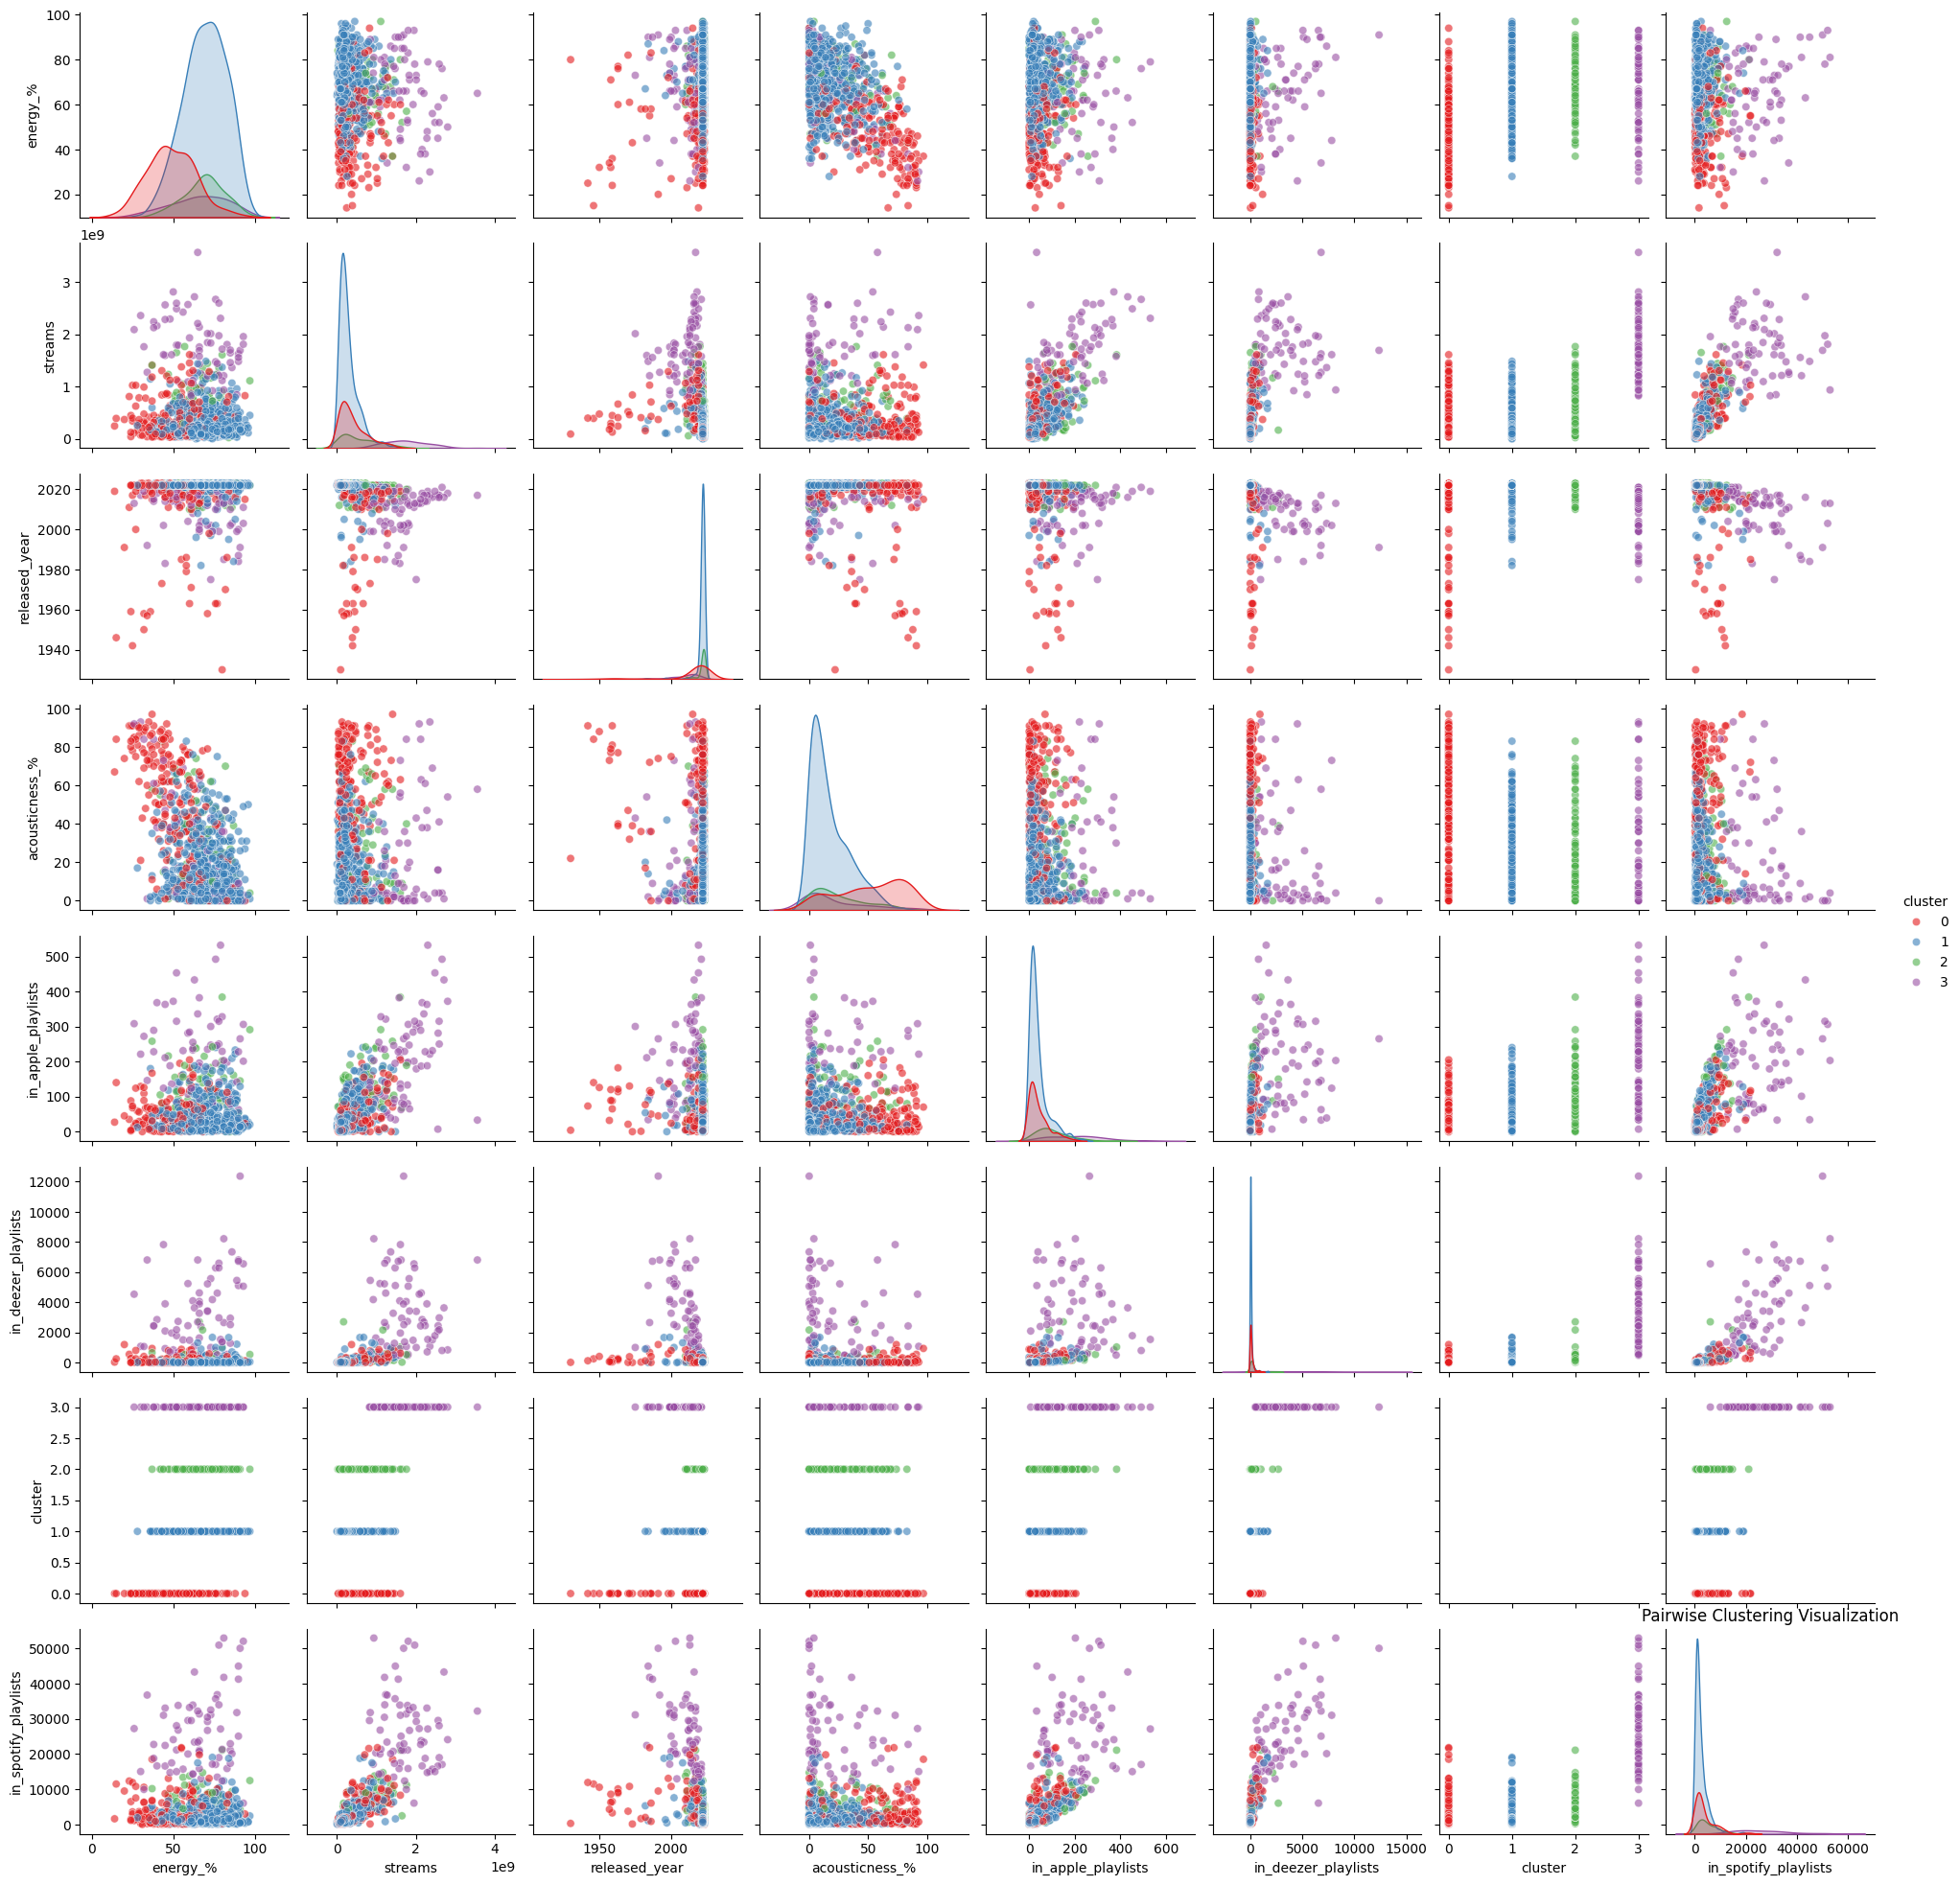

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal number of clusters, say k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clustering results (for 2 features, for simplicity)
# for var1, var2 in to_analyze:
#     sns.scatterplot(x=data[var1], y=data[var2], hue=data['cluster'], palette='Set1')
#     plt.title('Clustering Results')
#     plt.show()

# Plot pairwise scatter plots for all features
features_to_plot = list(set([item for pair in to_analyze for item in pair]))
sns.pairplot(data, vars=features_to_plot, hue='cluster', palette='Set1', plot_kws={'alpha': 0.6})
plt.title('Pairwise Clustering Visualization')
plt.show()
